# Capstone Final Project: Forecasting CO2 Emissions from Natural Gas<br>
by Adam M. Lang<br>
January 22, 2021<br>
MIT-Applied Data Science Bootcamp<br>
<br>
**Context**<br>
<br>
Climate Change is a major issue in today’s world. Global Warming is increasing by the minute. 
Greenhouse gases used to be absorbed/emitted and regulated by Earths natural systems and temperature. 
However, the industrial revolution that began in 1760 and continued to present day has continued to add suffocating abnormal levels of greenhouse gases to Earth’s atmosphere. CO2 is the predominant greenhouse gas being emitted by humans and thus causing the most damage to the atmosphere and concern.<br>
<br>
CO2 is about 84% or more of the greenhouse gases emitted by humans and the industrial revolution. CO2 accounts for 30 billion tons per year of greenhouse gas emissions. Levels are well above 400ppm, most recently the highest level recorded at Mount Loa Laboratory in Hawaii, USA was 417 ppm in 2020. Before the industrial revolution CO2 levels were at 270ppm or lower which was considered “safe”. Climate scientists aim for us to globally reduce CO2 levels to below 350ppm, problem is this number has been climbing every year.<br>
<br>
We know that fossil fuels are used extensively for electricity, transportation, industrial processes and other human activities. **Industrial natural CO2 gas emissions in the USA have risen the most since 2009 as seen in the graph above provided by the US Energy Information Administration.** Ironically, increasing use of natural gas has helped reduce the overall US CO2 emissions because it is the least carbon intensive of the fossil fuels used for electricity generation and industrial process heating. However it is still a concern as it accounts for almost 40% of electric power consumption in the USA. In recent years, the drop in natural gas prices, coupled with highly efficient natural gas-fired combined-cycle technology, made natural gas an attractive choice to serve baseload demand previously met by coal-fired generation. Climate scientists are concerned about another greenhouse gas that leaks into the atmosphere during natural gas production: methane. Methane has a warming effect up to 80 or 90 times more powerful than C02 over a 20-year timescale.<br>
<br>
**Data Science Objective**<br>
<br>
We thus aim to forecast the CO2 emissions for natural gas (the least carbon intensive fossil fuel) as closely monitoring the aforementioned rise in the use of this gas can only help to decrease our overall CO2 footprint in the USA and the atmosphere and thus reduce global warming.

# Problem Statement

Forecast the carbon emissions value for natural gas (NNEIEUS) fuel type for next 12 months
(2016-07 to 2017-07) and propose certain measures that can be adopted as policies to
reduce these emissions.

# Data Dictionary

This is past monthly data of Carbon dioxide emissions from electricity generation from the
US Energy Information Administration categorized by fuel type such as Coal, Natural gas and more. <br>
<br>
- **MSN:** Reference to Mnemonic Series Names (U.S. Energy Information Administration
Nomenclature)<br>
- **YYYYMM:** The month of the year on which these emissions were observed.<br>
- **Value:** Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide.<br>
- **Description:** Different category of electricity production through which carbon is
emissioned.

## Data Source

This dataset has been pre processed and prepared to serve the purpose of exploring the
problem of time series techniques. The raw data set is spread across many files and can be
accessed at: https://www.eia.gov/electricity/data.php

# Import Libraries

In [1]:
# Upgrade the statsmodels package to use AutoReg and ARMA Models
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 3.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# To ignore the warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
#if using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats

#Importing libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import pylab

#Importing library for date manipulation
from datetime import datetime as dt

## Import dataset

In [5]:
#import data
df = pd.read_excel('/content/drive/MyDrive/Data Set.xlsx')

#head of data
df.head()

MSN  YYYYMM   Value                               Description
0  CLEIEUS  197301  72.076  Coal Electric Power Sector CO2 Emissions
1  CLEIEUS  197302  64.442  Coal Electric Power Sector CO2 Emissions
2  CLEIEUS  197303  64.084  Coal Electric Power Sector CO2 Emissions
3  CLEIEUS  197304  60.842  Coal Electric Power Sector CO2 Emissions
4  CLEIEUS  197305  61.798  Coal Electric Power Sector CO2 Emissions

In [6]:
#tail of data
df.tail()

MSN  ...                                       Description
5089  TXEIEUS  ...  Total Energy Electric Power Sector CO2 Emissions
5090  TXEIEUS  ...  Total Energy Electric Power Sector CO2 Emissions
5091  TXEIEUS  ...  Total Energy Electric Power Sector CO2 Emissions
5092  TXEIEUS  ...  Total Energy Electric Power Sector CO2 Emissions
5093  TXEIEUS  ...  Total Energy Electric Power Sector CO2 Emissions

[5 rows x 4 columns]

In [7]:
#check value counts of MSN
df['MSN'].value_counts()

NNEIEUS    566
NWEIEUS    566
GEEIEUS    566
PAEIEUS    566
DKEIEUS    566
PCEIEUS    566
RFEIEUS    566
TXEIEUS    566
CLEIEUS    566
Name: MSN, dtype: int64

In [8]:
#df shape
df.shape

(5094, 4)

In [9]:
#number of rows per 9 energy types
5094/9

566.0

In [10]:
#check for missing values
df.isnull().sum().sum()

0

**Preliminary observations:**<br>
1. It appears we have 9 energy types in the MSN category. For this project the focus will be on 'NNEIEUS'. So we will eventually have to make a new dataframe with just this energy type.<br>
2. There are 566 entries in each energy category. Based on our math above the data set is evenly distributed with 566 rows for each energy type totaling 5094 rows and 4 columns.<br>
3. The year starts at 197301 which is January 1973 and the last entry in the data is 201607 which is July 2016. So we have 43 years of data to forecast 1 year ahead with. <br>
4. There are no missing values in the dataset which was expected as we were alerted that data had been curated prior to this. 

In [11]:
#check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSN          5094 non-null   object
 1   YYYYMM       5094 non-null   int64 
 2   Value        5094 non-null   object
 3   Description  5094 non-null   object
dtypes: int64(1), object(3)
memory usage: 159.3+ KB


**Observations**<br>
1. We can see that the YYYYMM column which is our date in year and month is an integer data type. We will have to extract the year and month and transform it into a datetime object.<br>
2. The Value column is an object data type. This value is supposed to represent "Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide". Since we can see the values are listed in decimals we should transform this to a float data type. 

# Data Cleaning

In [12]:
#write function to parse integer date to datetime format
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_excel("/content/drive/MyDrive/Data Set.xlsx", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

MSN   Value                               Description
YYYYMM                                                               
1973-01-01  CLEIEUS  72.076  Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS  64.442  Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS  64.084  Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS  60.842  Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS  61.798  Coal Electric Power Sector CO2 Emissions

In [13]:
#check tail
df.tail()

MSN    Value                                       Description
YYYYMM                                                                        
2016-03-01  TXEIEUS  115.997  Total Energy Electric Power Sector CO2 Emissions
2016-04-01  TXEIEUS  113.815  Total Energy Electric Power Sector CO2 Emissions
2016-05-01  TXEIEUS   129.44  Total Energy Electric Power Sector CO2 Emissions
2016-06-01  TXEIEUS  172.074  Total Energy Electric Power Sector CO2 Emissions
2016-07-01  TXEIEUS  201.958  Total Energy Electric Power Sector CO2 Emissions

Now we have proper datetime format in years and month.

In [14]:
#check datatypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSN          5094 non-null   object
 1   Value        5094 non-null   object
 2   Description  5094 non-null   object
dtypes: object(3)
memory usage: 159.2+ KB


In [15]:
#dataframe of not null groups
df = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
df.head(15)

MSN   Value                               Description
YYYYMM                                                               
1973-01-01  CLEIEUS  72.076  Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS  64.442  Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS  64.084  Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS  60.842  Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS  61.798  Coal Electric Power Sector CO2 Emissions
1973-06-01  CLEIEUS  66.538  Coal Electric Power Sector CO2 Emissions
1973-07-01  CLEIEUS  72.626  Coal Electric Power Sector CO2 Emissions
1973-08-01  CLEIEUS  75.181  Coal Electric Power Sector CO2 Emissions
1973-09-01  CLEIEUS  68.397  Coal Electric Power Sector CO2 Emissions
1973-10-01  CLEIEUS  67.668  Coal Electric Power Sector CO2 Emissions
1973-11-01  CLEIEUS  67.021  Coal Electric Power Sector CO2 Emissions
1973-12-01  CLEIEUS  71.118  Coal Electric Power Sector CO2 Emissions
1974-01-01  CLEIEUS   70.55  Coal Electric Power Sector CO2 Emissions
1974-02-01  CLEIEUS  62.929  Coal Electric Power Sector CO2 Emissions
1974-03-01  CLEIEUS  64.519  Coal Electric Power Sector CO2 Emissions

In [16]:
#convert value to float
df['Value'] = pd.to_numeric(df['Value'] , errors='coerce')


#check dtypes
df.dtypes

MSN             object
Value          float64
Description     object
dtype: object

Successfully converted Value to float.

In [17]:
#check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSN          4707 non-null   object 
 1   Value        4323 non-null   float64
 2   Description  4707 non-null   object 
dtypes: float64(1), object(2)
memory usage: 147.1+ KB


In [18]:
#check null values
df.isnull().sum().sum()

384

It appears that 384 rows have missing values after the transformation of the Value to float. Let's take a closer look at this.

In [19]:
#identify null values in dataframe
df_nan = df.loc[df.isnull().any(axis=1)]
df_nan.head()

MSN  Value                                        Description
YYYYMM                                                                       
1973-01-01  GEEIEUS    NaN  Geothermal Energy Electric Power Sector CO2 Em...
1973-02-01  GEEIEUS    NaN  Geothermal Energy Electric Power Sector CO2 Em...
1973-03-01  GEEIEUS    NaN  Geothermal Energy Electric Power Sector CO2 Em...
1973-04-01  GEEIEUS    NaN  Geothermal Energy Electric Power Sector CO2 Em...
1973-05-01  GEEIEUS    NaN  Geothermal Energy Electric Power Sector CO2 Em...

In [20]:
#check MSN data type to see if there are any missing values in the natural gas category
df_nan['MSN'].value_counts()

GEEIEUS    192
NWEIEUS    192
Name: MSN, dtype: int64

### It appears the missing values are all in the NWEIEUS and GEEIEUS energy types. This shouldn't effect our analysis so we will drop these values. 

In [21]:
#drop na
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSN          4323 non-null   object 
 1   Value        4323 non-null   float64
 2   Description  4323 non-null   object 
dtypes: float64(1), object(2)
memory usage: 135.1+ KB


Now we have an equally aligned dataset without na values.

# Multivariate Time Series - Exploratory Data Analysis

In [22]:
#describe data
df.describe()

Value
count  4323.000000
mean     39.252449
std      61.128676
min       0.009000
25%       0.730000
50%       6.236000
75%      40.638000
max     247.995000

In [23]:
df.shape

(4323, 3)

**Observations**<br>
- Value is the only numeric variable.<br>
- There are 4,323 rows now in the dataset.<br>
- The mean value for CO2 emissions is 39.25.<br>
- The min value for CO2 emissions is 0.0090.<br>
- The max value for CO2 emissions is 247.995.<br>
- Interestingly, the median is 6.23, and the 3rd quartile is not far away at 40.63. Being that the mean is smaller than the median by a value of 75, we can say the data is left skewed or negatively skewed. But really the mean is very close to the median so there may not be much of a skew.<br>
- The standard deviation is 61.12.

In [24]:
#categorical data describe
df.describe(include='object')

MSN                               Description
count      4323                                      4323
unique        9                                         9
top     NNEIEUS  Coal Electric Power Sector CO2 Emissions
freq        523                                       523

**observations**<br>
- MSN category which is the energy types in the dataset shows the top energy type is natural gas (NNEIEUS) which we will be forecasting in this project. It appears 523 times.<br>
- Description the Distillate Fuel, Including Kersoene-Type Jet Fuel is the top kind of gas appearing in the dataset. 

In [25]:
#group energy types
Energy_types = df.groupby('Description')
Energy_types.head()

MSN    Value                                        Description
YYYYMM                                                                         
1973-01-01  CLEIEUS   72.076           Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS   64.442           Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS   64.084           Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS   60.842           Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS   61.798           Coal Electric Power Sector CO2 Emissions
1973-01-01  NNEIEUS   12.175    Natural Gas Electric Power Sector CO2 Emissions
1973-02-01  NNEIEUS   11.708    Natural Gas Electric Power Sector CO2 Emissions
1973-03-01  NNEIEUS   13.994    Natural Gas Electric Power Sector CO2 Emissions
1973-04-01  NNEIEUS   14.627    Natural Gas Electric Power Sector CO2 Emissions
1973-05-01  NNEIEUS   17.344    Natural Gas Electric Power Sector CO2 Emissions
1973-01-01  DKEIEUS    2.375  Distillate Fuel, Including Kerosene-Type Jet F...
1973-02-01  DKEIEUS    2.061  Distillate Fuel, Including Kerosene-Type Jet F...
1973-03-01  DKEIEUS    1.171  Distillate Fuel, Including Kerosene-Type Jet F...
1973-04-01  DKEIEUS    1.022  Distillate Fuel, Including Kerosene-Type Jet F...
1973-05-01  DKEIEUS    0.949  Distillate Fuel, Including Kerosene-Type Jet F...
1973-01-01  PCEIEUS    0.128  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-02-01  PCEIEUS    0.106  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-03-01  PCEIEUS    0.083  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-04-01  PCEIEUS    0.130  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-05-01  PCEIEUS    0.167  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-01-01  RFEIEUS   24.867  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-02-01  RFEIEUS   20.867  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-03-01  RFEIEUS   19.780  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-04-01  RFEIEUS   16.562  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-05-01  RFEIEUS   17.754  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-01-01  PAEIEUS   27.369      Petroleum Electric Power Sector CO2 Emissions
1973-02-01  PAEIEUS   23.034      Petroleum Electric Power Sector CO2 Emissions
1973-03-01  PAEIEUS   21.034      Petroleum Electric Power Sector CO2 Emissions
1973-04-01  PAEIEUS   17.714      Petroleum Electric Power Sector CO2 Emissions
1973-05-01  PAEIEUS   18.870      Petroleum Electric Power Sector CO2 Emissions
1989-01-01  GEEIEUS    0.031  Geothermal Energy Electric Power Sector CO2 Em...
1989-02-01  GEEIEUS    0.028  Geothermal Energy Electric Power Sector CO2 Em...
1989-03-01  GEEIEUS    0.031  Geothermal Energy Electric Power Sector CO2 Em...
1989-04-01  GEEIEUS    0.030  Geothermal Energy Electric Power Sector CO2 Em...
1989-05-01  GEEIEUS    0.031  Geothermal Energy Electric Power Sector CO2 Em...
1989-01-01  NWEIEUS    0.371  Non-Biomass Waste Electric Power Sector CO2 Em...
1989-02-01  NWEIEUS    0.335  Non-Biomass Waste Electric Power Sector CO2 Em...
1989-03-01  NWEIEUS    0.371  Non-Biomass Waste Electric Power Sector CO2 Em...
1989-04-01  NWEIEUS    0.359  Non-Biomass Waste Electric Power Sector CO2 Em...
1989-05-01  NWEIEUS    0.371  Non-Biomass Waste Electric Power Sector CO2 Em...
1973-01-01  TXEIEUS  111.621   Total Energy Electric Power Sector CO2 Emissions
1973-02-01  TXEIEUS   99.185   Total Energy Electric Power Sector CO2 Emissions
1973-03-01  TXEIEUS   99.112   Total Energy Electric Power Sector CO2 Emissions
1973-04-01  TXEIEUS   93.183   Total Energy Electric Power Sector CO2 Emissions
1973-05-01  TXEIEUS   98.012   Total Energy Electric Power Sector CO2 Emissions

In [26]:
#reset index to plot dataframe
df.reset_index(inplace=True)

df.head()

YYYYMM      MSN   Value                               Description
0 1973-01-01  CLEIEUS  72.076  Coal Electric Power Sector CO2 Emissions
1 1973-02-01  CLEIEUS  64.442  Coal Electric Power Sector CO2 Emissions
2 1973-03-01  CLEIEUS  64.084  Coal Electric Power Sector CO2 Emissions
3 1973-04-01  CLEIEUS  60.842  Coal Electric Power Sector CO2 Emissions
4 1973-05-01  CLEIEUS  61.798  Coal Electric Power Sector CO2 Emissions

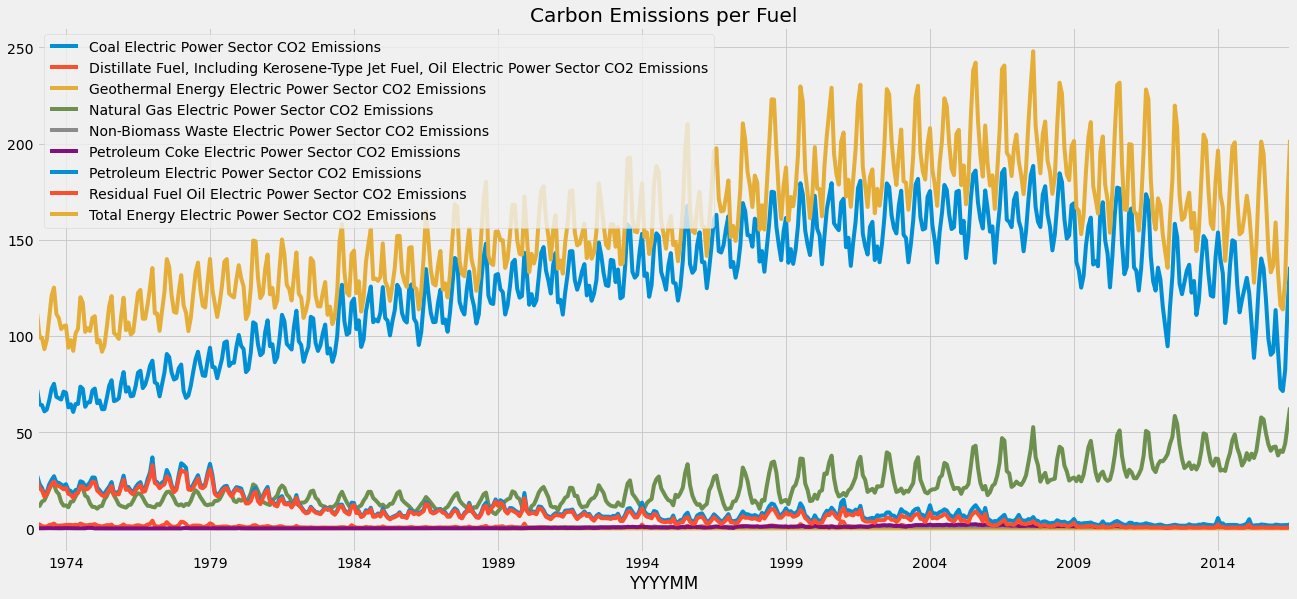

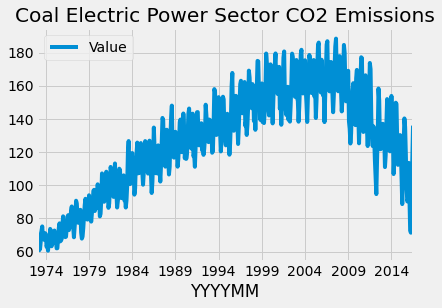

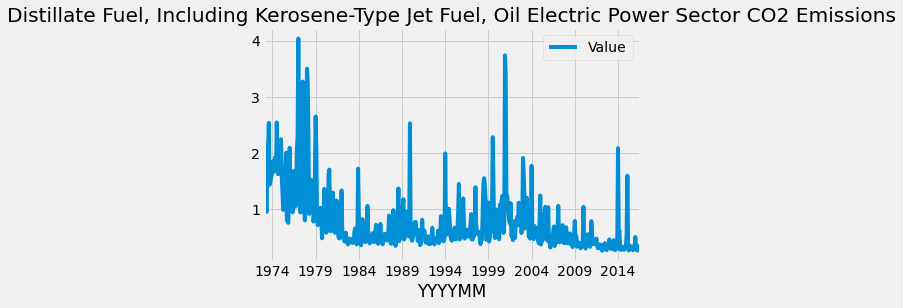

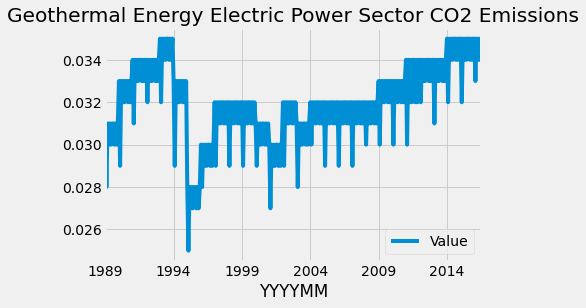

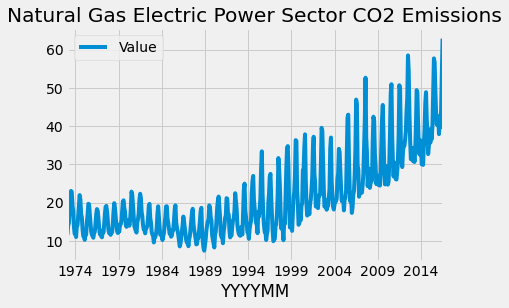

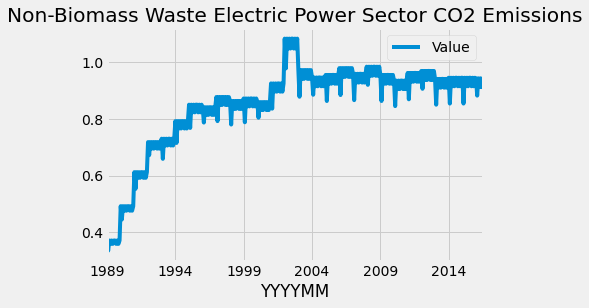

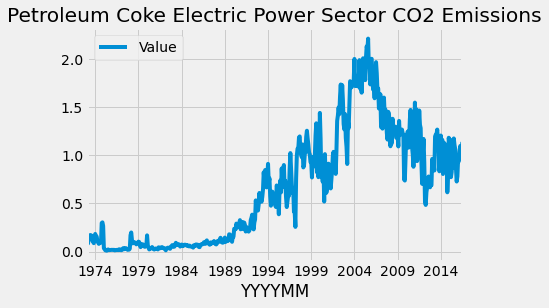

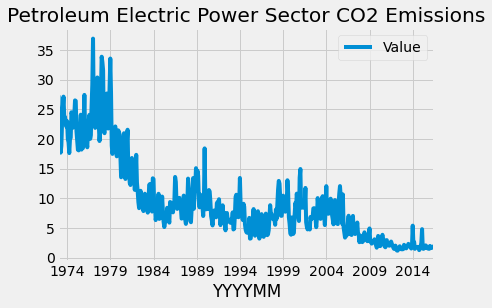

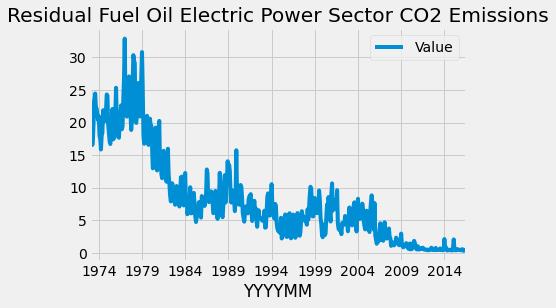

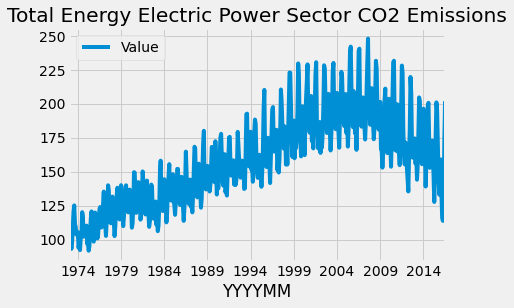

In [27]:
#multivariate time series plot
fuels = df.groupby('Description')
fig, ax = plt.subplots(figsize=(20,9))
for desc, group in fuels:
    group.plot(x='YYYYMM', y='Value', label=desc, ax=ax, title='Carbon Emissions per Fuel')
    group.plot(x='YYYYMM', y='Value', title=desc)
#fuels.plot(x='YYYYMM', y='Value')


**Observations**
- The main takeaway from this plotting should be that the time series we are most concerned about (Natural Gas) is continuing to rise in CO2 emissions steadily overtime whereas the other time series show either a plateau or decline in recent years. 

In [28]:
#set index again
df.set_index('YYYYMM',inplace=True)

df.head()

MSN   Value                               Description
YYYYMM                                                               
1973-01-01  CLEIEUS  72.076  Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS  64.442  Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS  64.084  Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS  60.842  Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS  61.798  Coal Electric Power Sector CO2 Emissions

### Create CO2 source dataframe to compare all CO2 energy sources

In [29]:
#groupby description and value
CO2_per_source = df.groupby('Description')['Value'].sum().sort_values()

In [30]:
#check index of new dataframe
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [31]:
#shorten names of columns for plotting
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

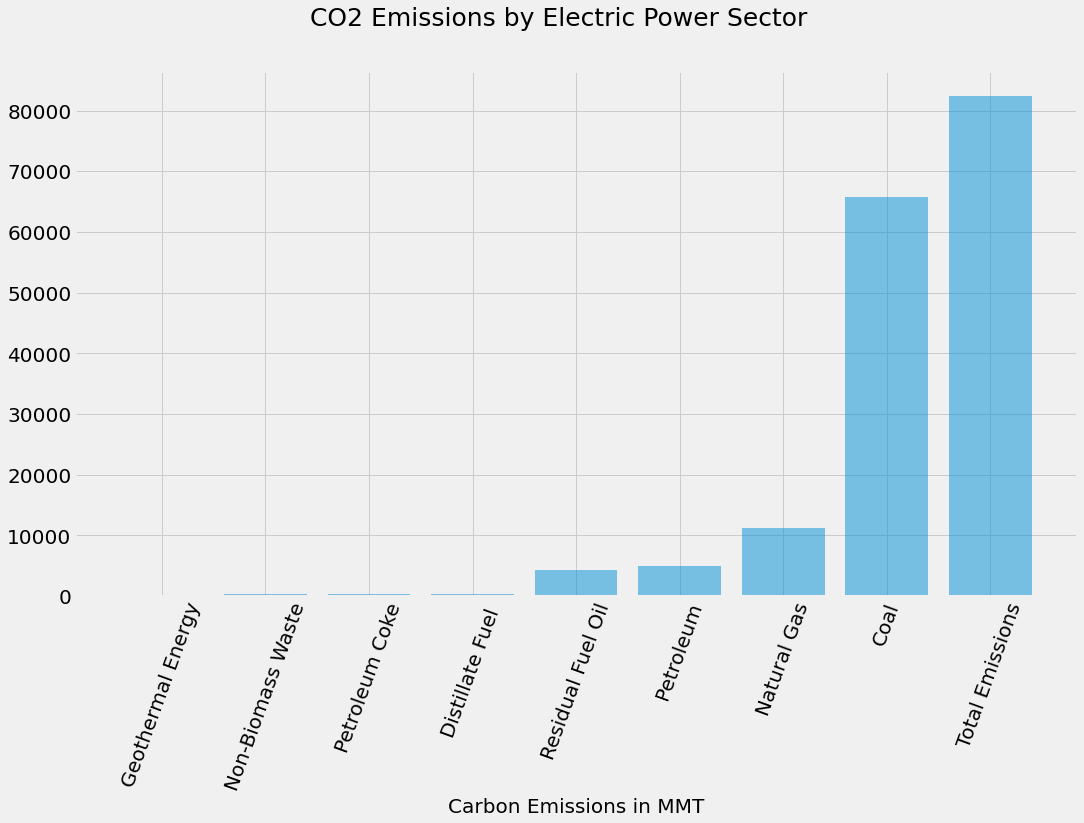

In [32]:
#create bar plot of CO2 emissiosn by electric power sector
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

**observations**<br>
- It appears that Coal has more CO2 emissions than Natural Gas.<br>
- Geothermal Energy has the least emissions.

# Natural Gas Emissions- Univariate (Exploratory) Analysis

### This is the goal of our data science project to investigate the influence of Natural Gas on CO2 emissions. We will start by making a separate dataframe for natural gas and then perform exploratory data analysis which will help us better understand the data before we perform forecasting/modeling.

In [33]:
#create dataset
gas = df[df.Description.str.contains('Natural Gas Electric Power Sector CO2 Emissions',case=False)]

gas.head()

MSN   Value                                      Description
YYYYMM                                                                      
1973-01-01  NNEIEUS  12.175  Natural Gas Electric Power Sector CO2 Emissions
1973-02-01  NNEIEUS  11.708  Natural Gas Electric Power Sector CO2 Emissions
1973-03-01  NNEIEUS  13.994  Natural Gas Electric Power Sector CO2 Emissions
1973-04-01  NNEIEUS  14.627  Natural Gas Electric Power Sector CO2 Emissions
1973-05-01  NNEIEUS  17.344  Natural Gas Electric Power Sector CO2 Emissions

In [34]:
#check size of dataframe
gas.shape

(523, 3)

In [35]:
#check datatypes
gas.dtypes

MSN             object
Value          float64
Description     object
dtype: object

In [36]:
#drop unnecessary columns
gas = gas.drop(columns=['MSN','Description'])

gas.head()

Value
YYYYMM            
1973-01-01  12.175
1973-02-01  11.708
1973-03-01  13.994
1973-04-01  14.627
1973-05-01  17.344

In [37]:
#descriptive statistics
gas.describe()

Value
count  523.000000
mean    21.597245
std     10.585556
min      7.448000
25%     13.427500
50%     18.459000
75%     27.076500
max     62.881000

**Observations**<br>
- Natural Gas data descriptive statistics are seen above.<br>
- Max is 62 which is far less than the entire dataset which has a max of 247.9.<br>
- Mean is 21.5, Median is 18.4. It appears the 1st and 3rd quartiles are evenly distributed around the median and closer to the mean. This hints at a skew in the values.<br>
- The std is 10.5<br>

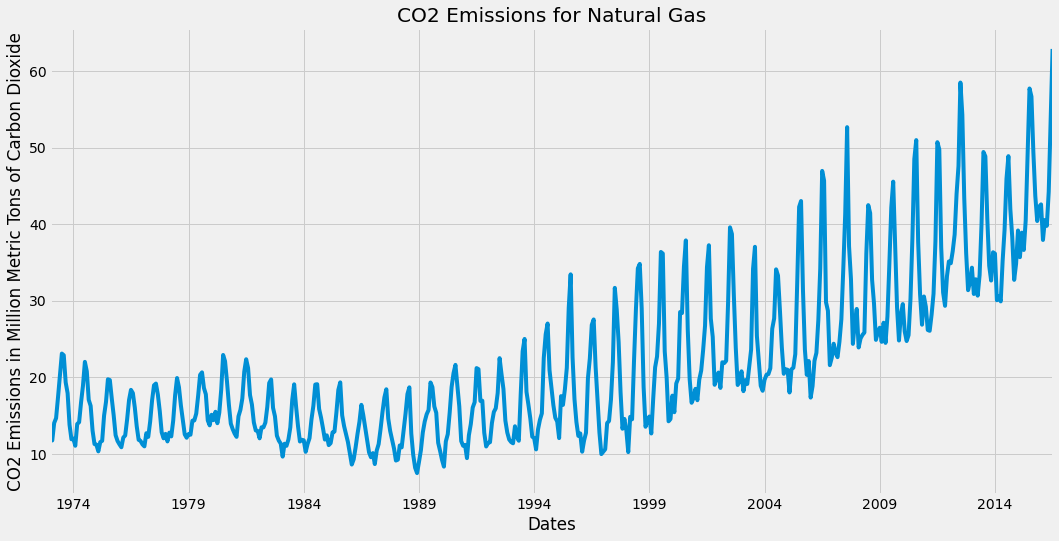

In [38]:
#plot time series
gas.index
ax=gas['Value'].plot(figsize=(16,8), title='CO2 Emissions for Natural Gas')
ax.set(xlabel='Dates',ylabel='CO2 Emissions in Million Metric Tons of Carbon Dioxide')
plt.show()

Natural Gas Time Series appears to have seasonality based on this plot. 

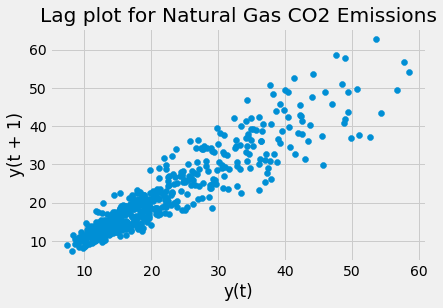

In [39]:
#lag plot
pd.plotting.lag_plot(gas['Value'])
plt.title('Lag plot for Natural Gas CO2 Emissions')
plt.show()

#### So we can see a linear trend in our data and the data set is not Random. There dont appear to be any real outliers as such also detected in this lag plot. Lag can also be useful to identify the suitable time series model for the data. So looking at this linear trend for our data an Auto Regressive model should be perfect for forecasting (i.e. ARMA, ARIMA, SARIMA).

We will make a distribution plot to examine the distribution of the time series variables. 

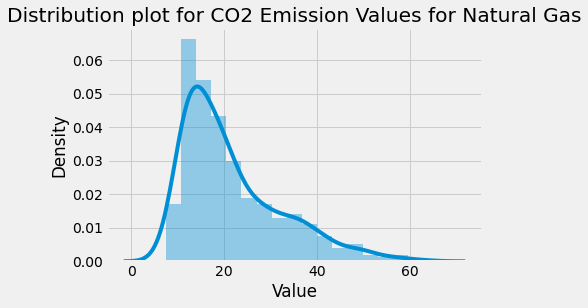

In [40]:
#Distribution plot
sns.distplot(gas['Value'])
plt.title('Distribution plot for CO2 Emission Values for Natural Gas')
plt.show()

We can see the distribution of the time series has a skew to it which also helps to show it is not stationary.

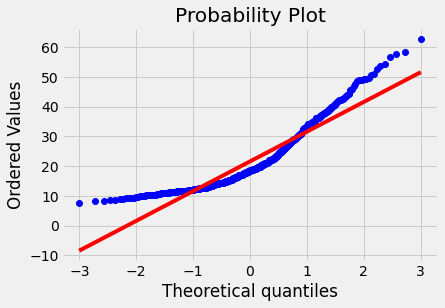

In [41]:
#probability plot
stats.probplot(gas['Value'],dist="norm",plot=pylab)
pylab.show()

The probability distribution plot validates that the time series is NOT stationary and continues to change over time as the points do not lie directly on the red line above. 

<Figure size 1152x576 with 0 Axes>

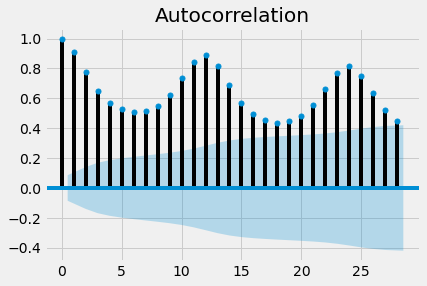

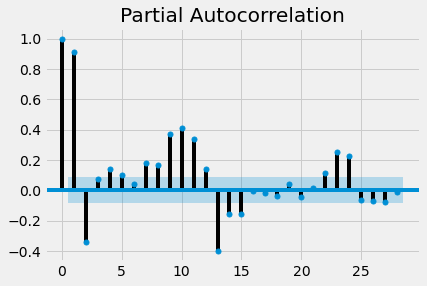

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize = (16,8))
plot_acf(gas) 
plt.show() 
plot_pacf(gas) 
plt.show();

From the above plots we can see there is autocorrelation in the natural gas dataset. This means when the CO2 emissions increase they continue to rise. When they decrease they continue to decrease. 

###  Calculating and Visualizing the rolling mean & standard deviation of the series (for 12 observations) to check the stationarity of the time series

In [43]:
gas.head()

Value
YYYYMM            
1973-01-01  12.175
1973-02-01  11.708
1973-03-01  13.994
1973-04-01  14.627
1973-05-01  17.344

In [44]:
# Calculating the rolling mean and standard deviation for a window of 12 observations
rolmean=gas.rolling(window=12).mean()    #calculate the mean here
rolstd=gas.rolling(window=12).std()     #calculate the standard deviation here
print(rolmean.head(15))
print('**************************************')
print('**************************************')
print(rolstd.head(15))

                Value
YYYYMM               
1973-01-01        NaN
1973-02-01        NaN
1973-03-01        NaN
1973-04-01        NaN
1973-05-01        NaN
1973-06-01        NaN
1973-07-01        NaN
1973-08-01        NaN
1973-09-01        NaN
1973-10-01        NaN
1973-11-01        NaN
1973-12-01  16.571333
1974-01-01  16.553333
1974-02-01  16.496083
1974-03-01  16.484917
**************************************
**************************************
               Value
YYYYMM              
1973-01-01       NaN
1973-02-01       NaN
1973-03-01       NaN
1973-04-01       NaN
1973-05-01       NaN
1973-06-01       NaN
1973-07-01       NaN
1973-08-01       NaN
1973-09-01       NaN
1973-10-01       NaN
1973-11-01       NaN
1973-12-01  4.139116
1974-01-01  4.160387
1974-02-01  4.237143
1974-03-01  4.244507


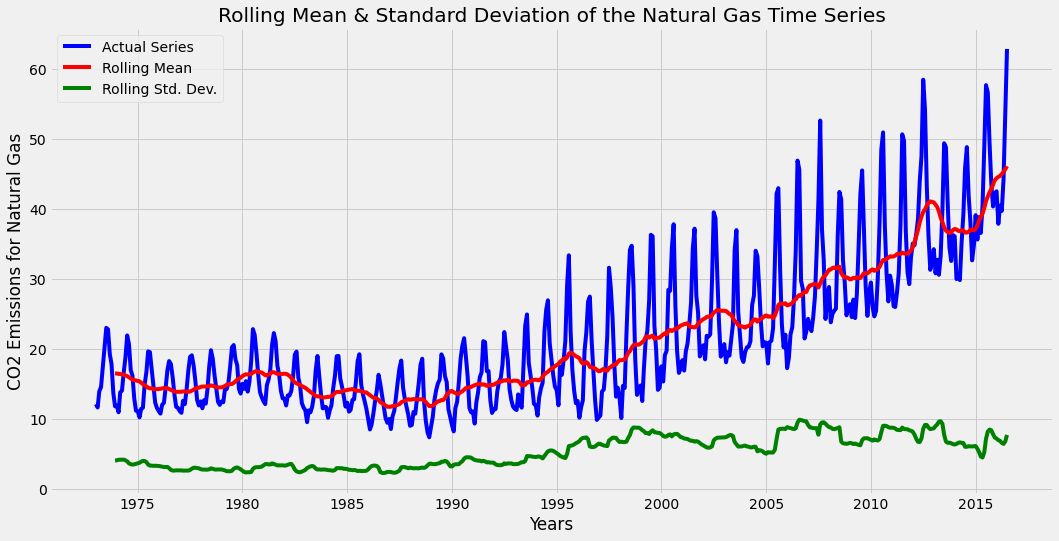

In [45]:
#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(gas, color='blue', label='Actual Series')     #fill the dataframe name
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean')    #fill the dataframe name 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')   #fill the dataframe name
plt.title('Rolling Mean & Standard Deviation of the Natural Gas Time Series')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions for Natural Gas')
plt.legend()
plt.show()

**Observations**<br>
- It appears the rolling mean trends upward continuously and is not constant.<br>
- The rolling standard deviation is also not consistent and always changing thus this confirms the time series is NOT stationary.

### Test Stationarity of the Time Series

In [46]:
#Define a function to use adfuller test
def adfuller(gas):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(gas['Value'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(gas)

Dickey-Fuller Test: 
Test Statistic            1.831215
p-value                   0.998409
Lags Used                19.000000
No. of Observations     503.000000
Critical Value (1%)      -3.443418
Critical Value (5%)      -2.867303
Critical Value (10%)     -2.569840
dtype: float64


P Value is quite large at 0.99 without splitting data into train and test so we can see the raw time series is NOT stationary and this will have to be thus transformed prior to any modeling. 

### Decompose Time Series into Trend, Seasonality and Residuals.

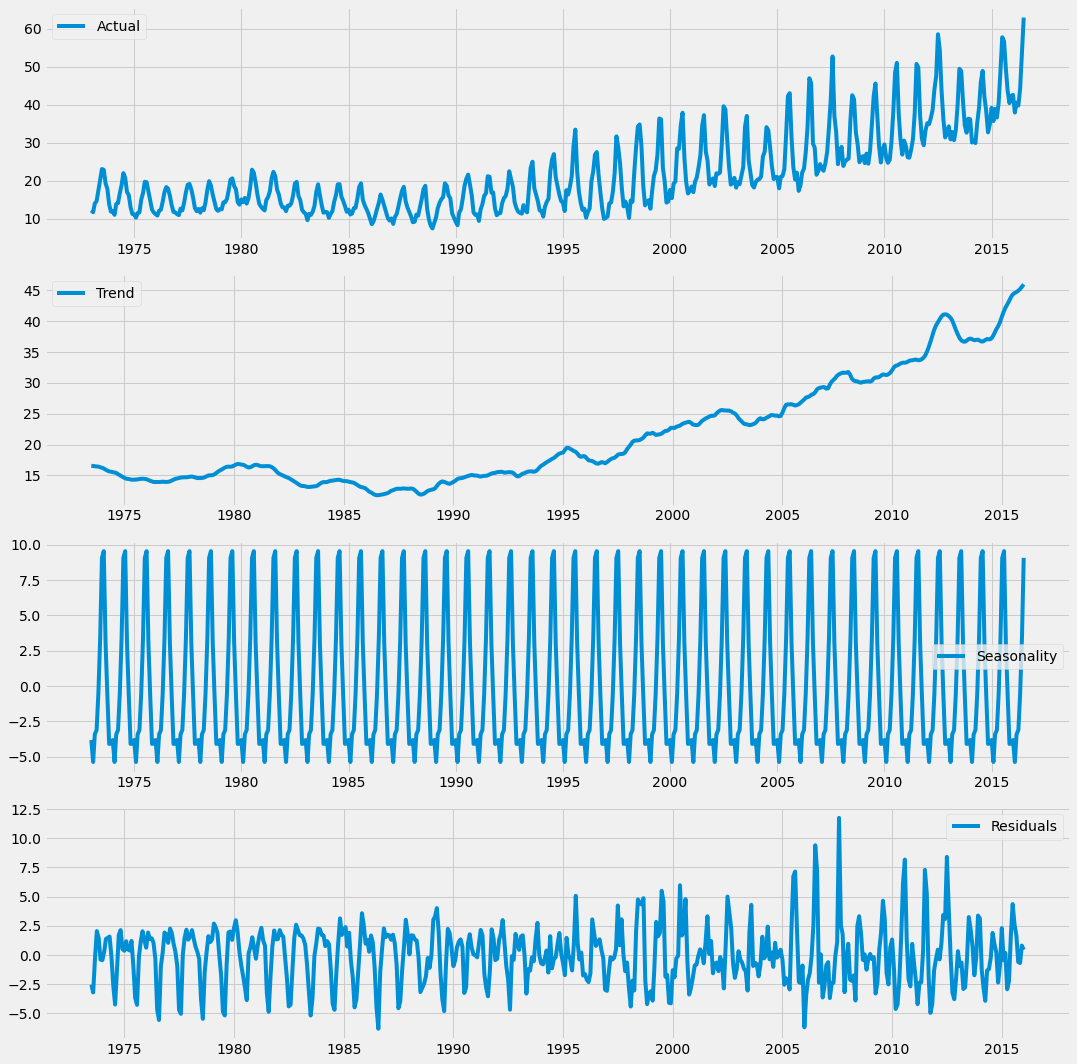

In [47]:
#Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(gas)      #Use the actual series to decompose

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(411)
plt.plot(gas, label='Actual')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()

### Natural Gas Exploratory Analysis Conclusions:<br>
1. Time series is NOT stationary, we will have to perform log transformation, differencing, and shifting to make series stationary prior to modeling, especially for autoregressive modeling.<br>
2. There is a linear trend in the data based on the lag plot which suggests that the best modeling schema will be autoregression such as ARIMA, ARMA or SARIMA.<br>
3. Time series has seasonality based on time series plotting.<br>
4. Compared to other time series in the data set the Natural Gas data appears to have the most linear trend with constant continual growth over time.<br>

# Changepoint Detection

- Change point detection (or CPD) detects abrupt shifts in time series trends (i.e. shifts in a time series’ instantaneous velocity), that can be easily identified via the human eye, but are harder to pinpoint using traditional statistical approaches.<br>
<br>
- CPD is great for the following use cases:<br>
1. Detecting anomalous sequences/states in a time series<br>
2. Detecting the average velocity of unique states in a time series<br>
3. Detecting a sudden change in a time series state in real time<br>
<br>
I am going to use changepoint detection to identify windows to consider using for a train-test split in the data set. 

In [48]:
#install ruptures package
!pip install ruptures

     |████████████████████████████████| 706kB 4.2MB/s 


#### We will use the Window-based search method. This is a relatively simple approximate search method. The window-based search method “computes the discrepancy between two adjacent windows that move along with signal y”. When the two windows are highly dissimilar, a high discrepancy between the two values occurs, which is indicative of a change point.<br>
<br>
Other changepoint detection methods include: PELT, Binary Segmentation, and Dynamic Programming. For our purposes the window-based method will suffice. 

In [49]:
#import ruptures package
import ruptures as rpt

In [50]:
#Convert the time series values to a numpy 1D array
changepoint1=np.array(gas['Value'])

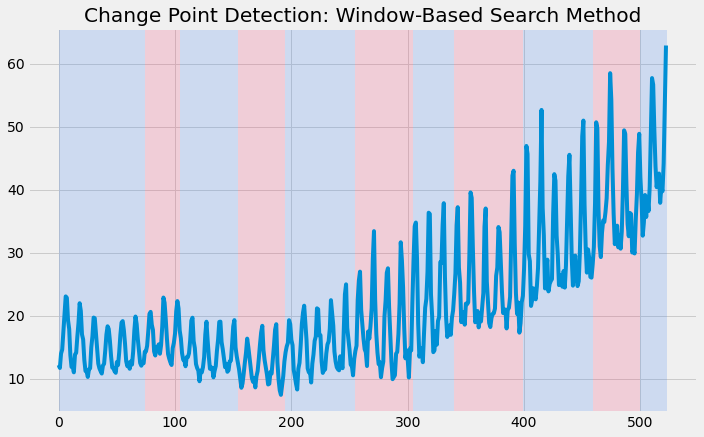

In [51]:
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(changepoint1)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(changepoint1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

**Observations**<br>
- It appears there are at least 5 major changepoints in the dataset.<br>
- The largest changepoint appears around datapoint 325 until 400.<br>
- The most recent changepoint detected was around datapoints 450 to 500. This should prove useful for determining where to consider the train test split. We usually want to include more recent years in the training fold, usually around 5-10 years so we should consider it based upon when the last changepoint occurred. 

In [52]:
#examine last changepoint
gas.iloc[450:500]

Value
YYYYMM            
2010-07-01  48.489
2010-08-01  50.968
2010-09-01  37.642
2010-10-01  30.811
2010-11-01  26.843
2010-12-01  30.528
2011-01-01  29.188
2011-02-01  26.152
2011-03-01  26.043
2011-04-01  28.164
2011-05-01  30.881
2011-06-01  37.765
2011-07-01  50.694
2011-08-01  49.767
2011-09-01  36.941
2011-10-01  31.040
2011-11-01  29.308
2011-12-01  33.180
2012-01-01  35.110
2012-02-01  34.877
2012-03-01  36.456
2012-04-01  38.626
2012-05-01  43.922
2012-06-01  47.572
2012-07-01  58.490
2012-08-01  54.282
2012-09-01  43.384
2012-10-01  36.176
2012-11-01  31.355
2012-12-01  32.434
2013-01-01  34.294
2013-02-01  30.857
2013-03-01  32.778
2013-04-01  30.640
2013-05-01  33.337
2013-06-01  39.974
2013-07-01  49.416
2013-08-01  48.842
2013-09-01  40.751
2013-10-01  34.547
2013-11-01  32.614
2013-12-01  36.308
2014-01-01  36.133
2014-02-01  30.036
2014-03-01  30.554
2014-04-01  29.885
2014-05-01  35.211
2014-06-01  39.228
2014-07-01  45.901
2014-08-01  48.871

**Observations**<br>
- It appears the last changepoint occurs between 2010 and 2014. 

In [53]:
#examine previous changepoint
gas.iloc[325:400]

Value
YYYYMM            
2000-02-01  15.405
2000-03-01  19.158
2000-04-01  19.809
2000-05-01  28.502
2000-06-01  28.360
...            ...
2005-12-01  22.096
2006-01-01  17.316
2006-02-01  18.825
2006-03-01  22.129
2006-04-01  23.163

[75 rows x 1 columns]

In [54]:
#check tail of dataframe
gas.tail()

Value
YYYYMM            
2016-03-01  40.525
2016-04-01  39.763
2016-05-01  44.210
2016-06-01  53.567
2016-07-01  62.881

In summary, we will include the last 15 years in our training data set. We know that this will start at July 2000 and end at July 2015. Based on our changepoint analysis we see that we will be including two major changepoints that occurred between approximately 2000 and 2006 and then approximately 2010-2014. Based on our outcomes we could always consider adding or subtracting years. We do know from the EIA Data description that industrial natural gas usage has increased the most since 2009 so it is good that we are completely including this major trend in our training data. 

# Data Pre-Processing: Splitting the Dataset

### Train and Test Split

In [55]:
# Splitting the data into train and test
#split based on date
df_train = gas.loc['2000-06-01':'2015-06-01']
df_test = gas.loc['2015-07-01' : '2016-07-01']
print(df_train)
print(df_test)

             Value
YYYYMM            
2000-06-01  28.360
2000-07-01  34.422
2000-08-01  37.859
2000-09-01  26.159
2000-10-01  19.687
...            ...
2015-02-01  35.668
2015-03-01  38.872
2015-04-01  36.610
2015-05-01  40.440
2015-06-01  48.920

[181 rows x 1 columns]
             Value
YYYYMM            
2015-07-01  57.712
2015-08-01  56.662
2015-09-01  49.384
2015-10-01  43.680
2015-11-01  40.394
2015-12-01  42.270
2016-01-01  42.566
2016-02-01  37.918
2016-03-01  40.525
2016-04-01  39.763
2016-05-01  44.210
2016-06-01  53.567
2016-07-01  62.881


In [56]:
#install pmdarima library
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.1MB/s 
     |████████████████████████████████| 2.1MB 15.8MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [57]:
#install fbprophet
#!pip install fbprophet

In [58]:
#import statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations


### Function for calculating RMSE & %MAPE

If the data has no outliers RMSE (Root Mean Square Error) is a good metric to use. %MAPE (Mean Absolute Percentage Error) provides a more inutitive understanding as it is expressed in percentage. We do not use %MAPE if the series is intermittent to avoid division by zero. 

In [59]:
#define function for calculating RMSE and %MAPE
def accuracy(y1,y2):
    
    accuracy_df=pd.DataFrame()
    
    rms_error = np.round(rmse(y1, y2),1)
    
    map_error = np.round(np.mean(np.abs((np.array(y1) - np.array(y2)) / np.array(y1))) * 100,1)
           
    accuracy_df=accuracy_df.append({"RMSE":rms_error, "%MAPE": map_error}, ignore_index=True)
    
    return accuracy_df

# Forecast Modeling

## 1. ARMA Model

### Test Stationarity of Time Series

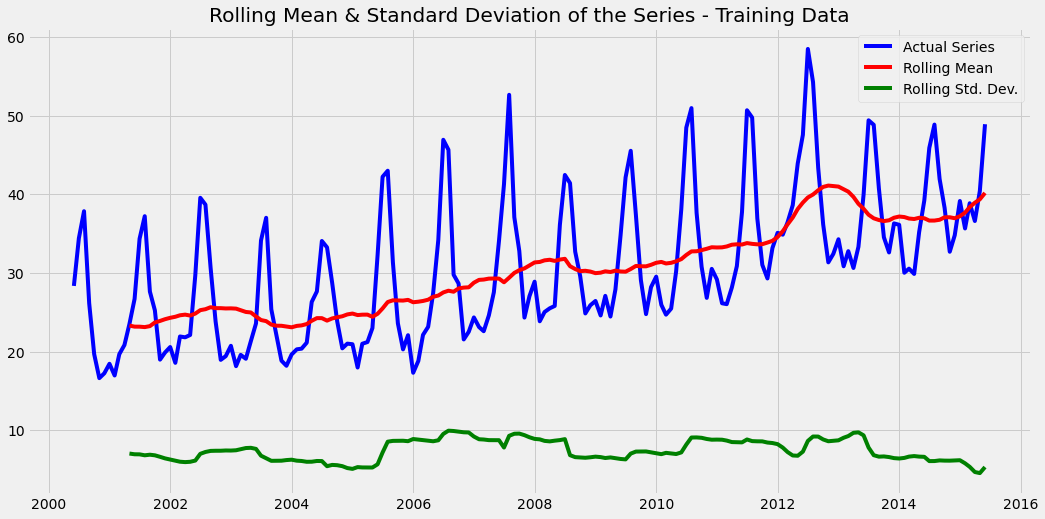

In [60]:
# Calculating the rolling mean and standard deviation for a window of 12 observations
rolmean=df_train.rolling(window=12).mean()
rolstd=df_train.rolling(window=12).std()

#Visualizing the rolling mean and standard deviation
#plot actual value and plot rolling/mean value
plt.figure(figsize=(16,8))
actual = plt.plot(df_train, color='blue', label='Actual Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series - Training Data')
plt.legend()
plt.show()

**Observations of training dataset**<br>
- We can see there is a upward trend in the series.<br>
- We can confirm that the series is not stationary as mean is always changing.

We can also use the Augmented Dickey Fuller (ADF) test to test if the series is stationary or not. The hypotheses for ADF test are defined as:<br>
<br>
- Null hypothesis: Time Series is non-stationary<br>
- Alternative hypothesis - Time Series is stationary<br>

In [61]:
#Define a function to use adfuller test
def adfuller(df_train):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(df_train['Value'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(df_train)

Dickey-Fuller Test: 
Test Statistic           -0.431951
p-value                   0.904626
Lags Used                14.000000
No. of Observations     166.000000
Critical Value (1%)      -3.470370
Critical Value (5%)      -2.879114
Critical Value (10%)     -2.576139
dtype: float64


**Observations**<br>
1. From the above test, we see that the p-value = 0.904 i.e. > 0.05 (For 95% confidence intervals) therefore, we fail to reject the null hypothesis.<br>
2. Hence, we can confirm that the series is non-stationary.

#### Make Series Stationary

We can use some of the following methods to make a non-stationary series to stationary:<br>
<br>
1. Log transformation<br>
2. Differencing<br>
3. Shifting the series (lagged series)<br>
<br>
First we will try the log transformation on this series to remove exponential variance and again check the stationarity of the series

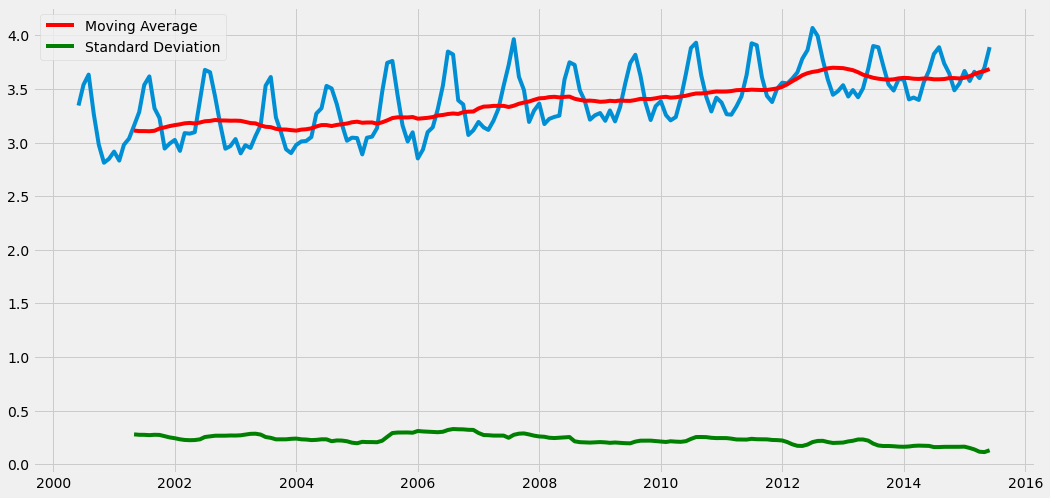

In [62]:
# Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
df_log = np.log(df_train)
MAvg = df_log.rolling(window=12).mean()
MStd = df_log.rolling(window=12).std()
plt.plot(df_log)
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.legend()
plt.show()

In [63]:
#check adfuller test
adfuller(df_log)

Dickey-Fuller Test: 
Test Statistic           -0.474845
p-value                   0.896832
Lags Used                14.000000
No. of Observations     166.000000
Critical Value (1%)      -3.470370
Critical Value (5%)      -2.879114
Critical Value (10%)     -2.576139
dtype: float64


**Observations:**<br>
<br>
The log transformation made the mean more steady, and the standard deviation is also more steady, however both are still changing and moving upwards so we have not achieved full stationarity. The adfuller test also shows a p-value of 0.896 which is still not showing stationarity.

Let's use the differencing method over the series to remove temporal dependence (trend) and again check the stationarity of the series.

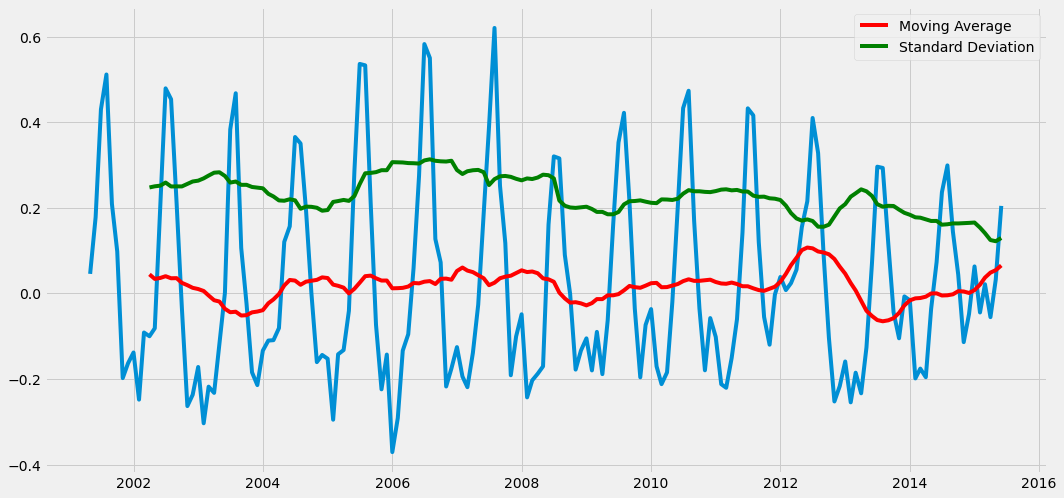

In [64]:
# Visualize the rolling mean and standard deviation after using log transform and differencing 
plt.figure(figsize=(16,8))
df_log_diff = df_log - MAvg
MAvg_diff = df_log_diff.rolling(window=12).mean()    #calculate the mean
MStd_diff = df_log_diff.rolling(window=12).std()    #calculate the standard deviation
plt.plot(df_log_diff)                                     #plot the dataframe with differencing
plt.plot(MAvg_diff, color='r', label = 'Moving Average')  #plot the moving average of the dataframe with differencing
plt.plot(MStd_diff, color='g', label = 'Standard Deviation') #plot the standard deviation of the dataframe with differencing
plt.legend()
plt.show()

#Dropping the null values that we get after applying diffrencing method
df_log_diff = df_log_diff.dropna()

In [65]:
#check adfuller test
adfuller(df_log_diff)

Dickey-Fuller Test: 
Test Statistic           -4.759481
p-value                   0.000065
Lags Used                14.000000
No. of Observations     155.000000
Critical Value (1%)      -3.473259
Critical Value (5%)      -2.880374
Critical Value (10%)     -2.576812
dtype: float64


**Observations**<br>
- Both mean and std appear more constant overtime but are still changing. The p-value of the adfuller test is much improved at 0.000065, which means the time series is now more stationary.

Let's shift the series by order 1 (or by 1 month) & apply differencing (using lagged series) and then check the rolling mean and standard deviation.

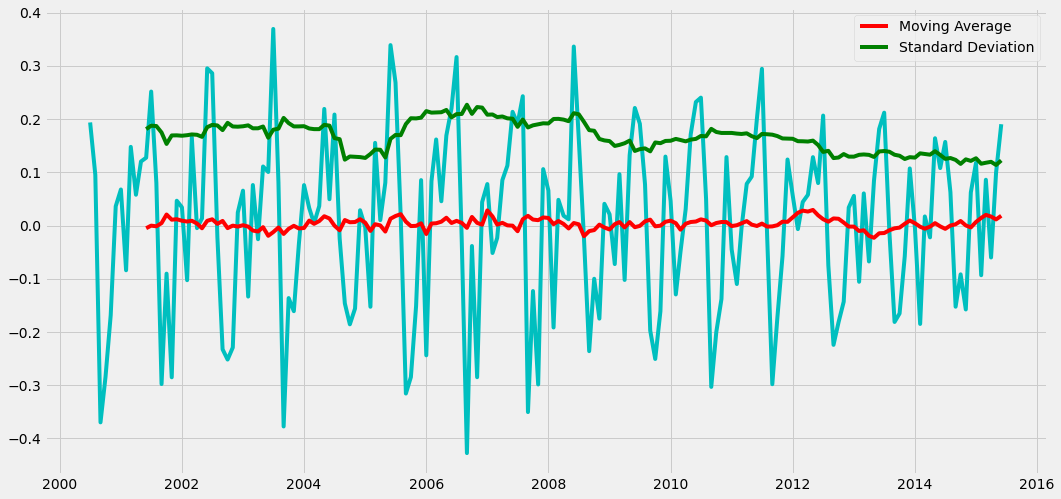

In [66]:
plt.figure(figsize=(16,8))
df_shift = df_log - df_log.shift(periods = 1)
MAvg_shift = df_shift.rolling(window=12).mean()   #calculate the mean
MStd_shift = df_shift.rolling(window=12).std()   #calculate the standard deviation
plt.plot(df_shift, color='c')                       #plot the dataframe with lag
plt.plot(MAvg_shift, color='red', label = 'Moving Average')    #plot the moving average of the dataframe with lag
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')    #plot the standard deviation of the dataframe with lag
plt.legend()
plt.show()

#Dropping the null values that we get after applying diffrencing method
df_shift = df_shift.dropna()

In [67]:
#check adfuller test
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic           -4.102674
p-value                   0.000959
Lags Used                14.000000
No. of Observations     165.000000
Critical Value (1%)      -3.470616
Critical Value (5%)      -2.879221
Critical Value (10%)     -2.576197
dtype: float64


**Observations**<br>
By shifting the series by order 1 (1 month), and applying differencing (using lagged series) we were able to refine the stationarity and the mean and standard deviation are now significantly smoother. The p-value also continues to confirm that we have stationarity and the p-value remains improved at 0.000959.

### Decomposing the time series components into Trend, Seasonality and Residual

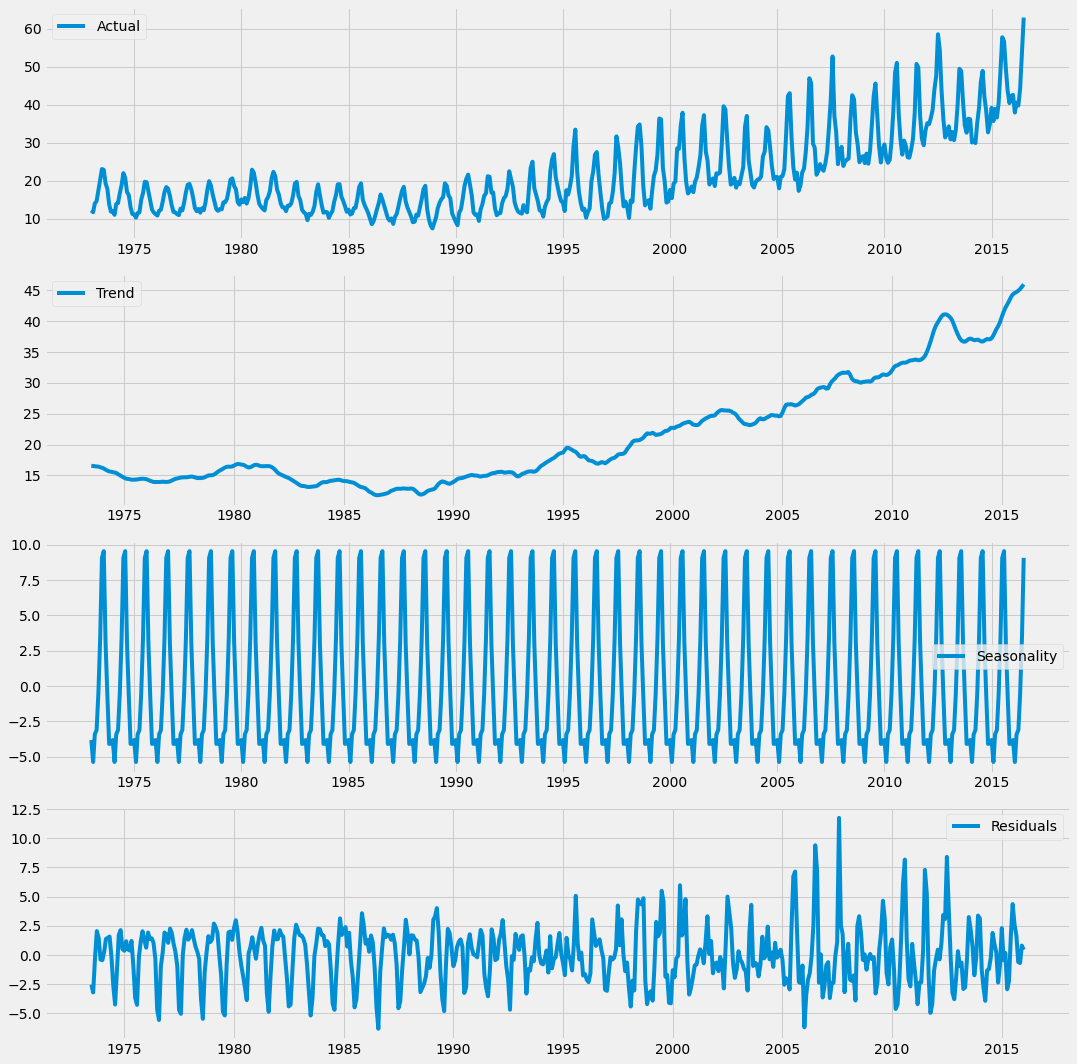

In [68]:
#Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(gas)      #Use the actual series to decompose

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(411)
plt.plot(gas, label='Actual')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()

**Observations:**<br>
<br>
1. We can see there is a significant Trend, Seasonality, and Residuals components within the Time-Series.<br>
2. The Trend is directly linear and increases yearly with a steady slope following the Actual Time-Series.<br>
3. Seasonality has an oscillating peaks and troughs that are the same from the time series origin to its ending. The peaks and troughs are mostly fixed therefore they are NOT cyclical.<br>
4. The Residuals appear to be downsloping and negative until about 2000 when there is consistent rise to more positive values.

### Plotting the auto-correlation function and partial auto-correlation function to get p and q value for AR, MA and ARMA models

In [69]:
#Importing acf and pacf functions
from statsmodels.tsa.stattools import acf, pacf

#define function
def pacf_acf_plot(df_shift):
#Using 20 lags in the series
  lag_acf = acf(df_shift, nlags=14,fft=False)
  lag_pacf = pacf(df_shift, nlags=14, method='ols')

  plt.figure(figsize=(16,8))
  plt.subplot(121)
  plt.plot(lag_acf)
  plt.axhline(y=0,linestyle='--',color='red')
  plt.axhline(y=-1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
  plt.axhline(y=1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
  plt.title('Autocorrelation Function (acf)')

  plt.subplot(122)
  plt.plot(lag_pacf)
  plt.axhline(y=0,linestyle='--',color='red')
  plt.axhline(y=-1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
  plt.axhline(y=1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
  plt.title('Partial Autocorrelation Function (pacf)')
  plt.show()

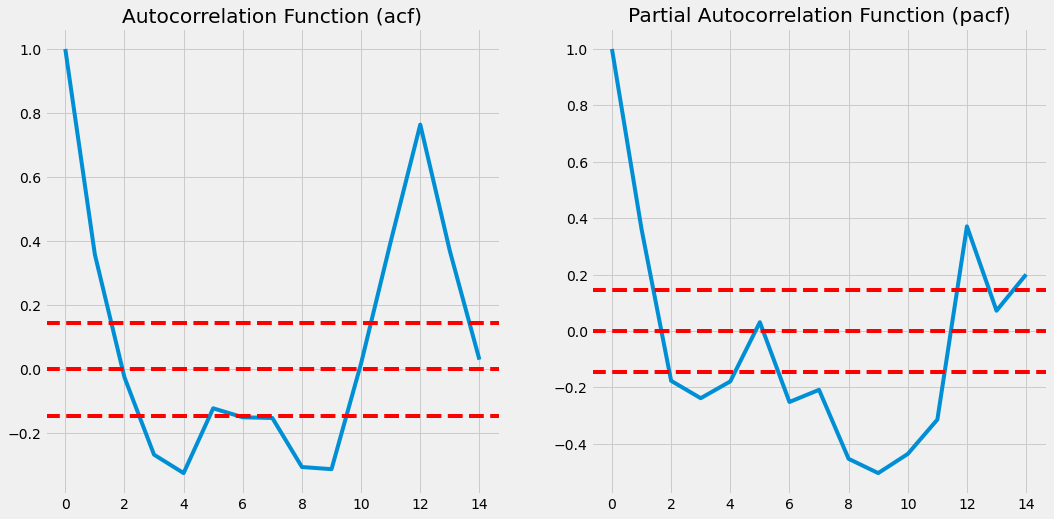

In [70]:
pacf_acf_plot(df_shift)

We will try another way to plot the acf and pacf to confirm the values. Although it appears to enter the confidence bands between 1 and 2. 

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
def acf_pacf(df_shift):
  plt.figure(figsize = (16,8))
  plot_acf(df_shift)
  plt.show()
  plot_pacf(df_shift)
  plt.show();

<Figure size 1152x576 with 0 Axes>

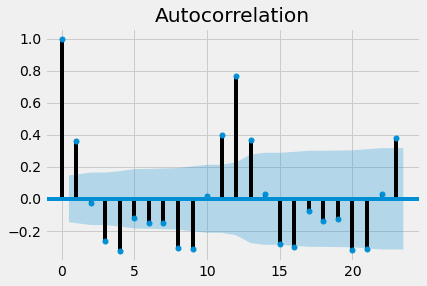

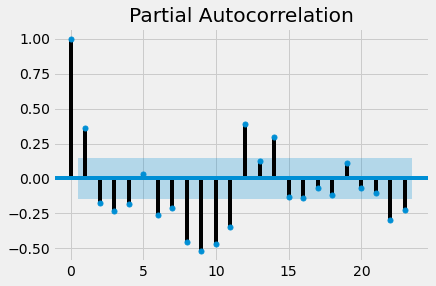

In [72]:
#call function
acf_pacf(df_shift)

**Observations**:<br>
We can see that in both plots, the blue line is entering into the confidence interval (dotted red) at 1, and the most prominent marker in the blue plots is at 1, therefore we will be using the values of p, q values as 1, however it is very close to 2 so 2 might work as well.

### AR Model

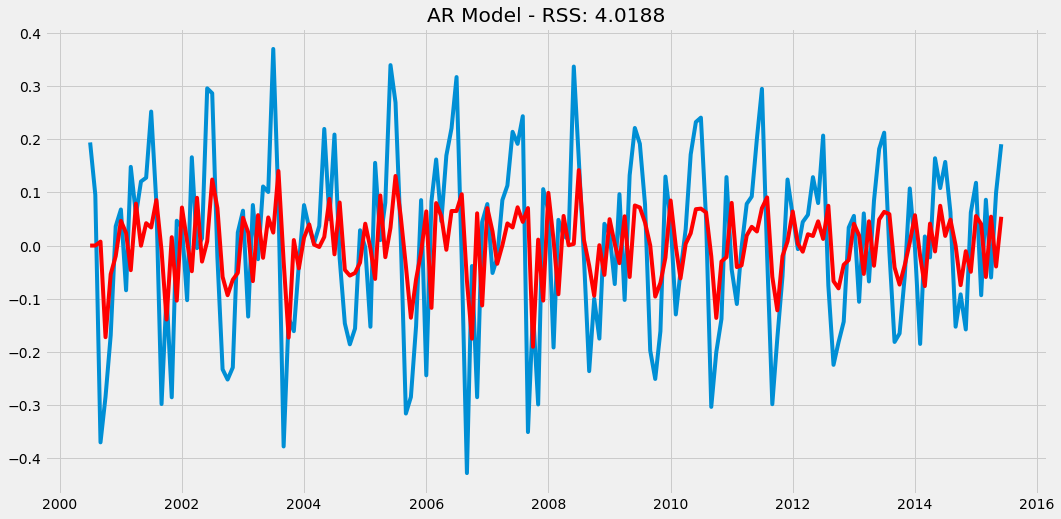

In [73]:
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

#Comparing the actual & predicted series by AR model and calculating the Residual Sum of Squares
df_shift.index.freq='MS'
plt.figure(figsize=(16,8))
model_AR = AutoReg(df_shift, lags=2) #Using number of lags as 2
results_AR = model_AR.fit()
plt.plot(df_shift)   #Visualizing the actual series used for modelling
predict = results_AR.predict(start=0,end=len(df_shift)-1)
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RSS: %.4f'% sum((predict-df_shift['Value'])**2))   #calculate the residual sum of squares
plt.show()

In [74]:
#print results of model
print(results_AR.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  180
Model:                     AutoReg(2)   Log Likelihood                  85.848
Method:               Conditional MLE   S.D. of innovations              0.149
Date:                Fri, 22 Jan 2021   AIC                             -3.758
Time:                        03:37:37   BIC                             -3.686
Sample:                    09-01-2000   HQIC                            -3.729
                         - 06-01-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.011      0.117      0.907      -0.021       0.023
Value.L1       0.4237      0.074      5.727      0.000       0.279       0.569
Value.L2      -0.1768      0.074     -2.397      0.0

**Observations**:<br>
<br>
- We can see that by using AR model, we get RSS = 4.0188. Let us use MA and ARMA models and see if we can reduce the RSS further and improve the model.<br>
- We can also see that the model results show an AIC value of -3.758 which is small. The p-values of the values in the model are close to zero. Let us see if we can improve these results.

### MA Model

We will be using ARMA model with p=0 so that it will work as MA Model.

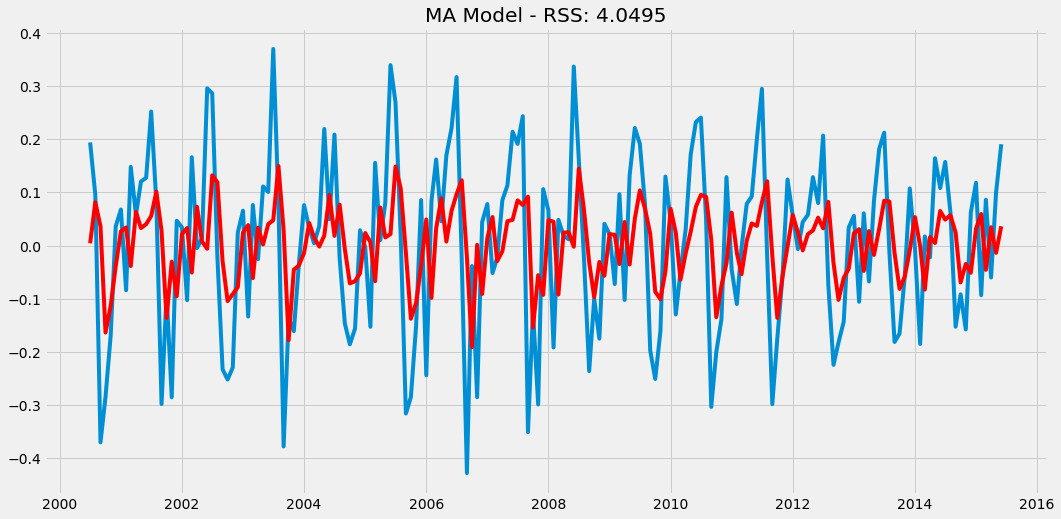

In [75]:
#Importing ARMA
from statsmodels.tsa.arima_model import ARMA

#Comparing the actual & predicted series by MA model and calculating the Residual Sum of Squares
plt.figure(figsize=(16,8))
df_shift.index.freq='MS'
model_MA = ARMA(df_shift, order=(0,2)) #Using p=0 and q=2
results_MA = model_MA.fit()
plt.plot(df_shift)              #Visualzing the actual series used for modelling
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model - RSS: %.4f'% sum((results_MA.fittedvalues-df_shift['Value'])**2))    #calculate the residual sum of squares
plt.show()

In [76]:
#print results of model
print(results_MA.summary())

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                  180
Model:                     ARMA(0, 2)   Log Likelihood                  86.136
Method:                       css-mle   S.D. of innovations              0.150
Date:                Fri, 22 Jan 2021   AIC                           -164.272
Time:                        03:37:37   BIC                           -151.500
Sample:                    07-01-2000   HQIC                          -159.093
                         - 06-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0043      0.018      0.242      0.809      -0.030       0.039
ma.L1.Value     0.4204      0.072      5.817      0.000       0.279       0.562
ma.L2.Value     0.1652      0.107      1.541    

**Observations**:<br>
<br>
- We can see that by using MA model, we get RSS = 4.0495 which is higher than the AR model but not by much. Let us use ARMA model and see if we can reduce the RSS further.<br>
- We can see this MA model is improved from the AR model as the AIC value is -164.272 (much smaller), and the p values of the coefficients are all close to 0, however the ma.L2 value is positive at 0.123. This can be improved upon, let us try to run an ARMA model.

### ARMA Model

We will using p=2 and q=2 as inferred from acf and pacf plots.

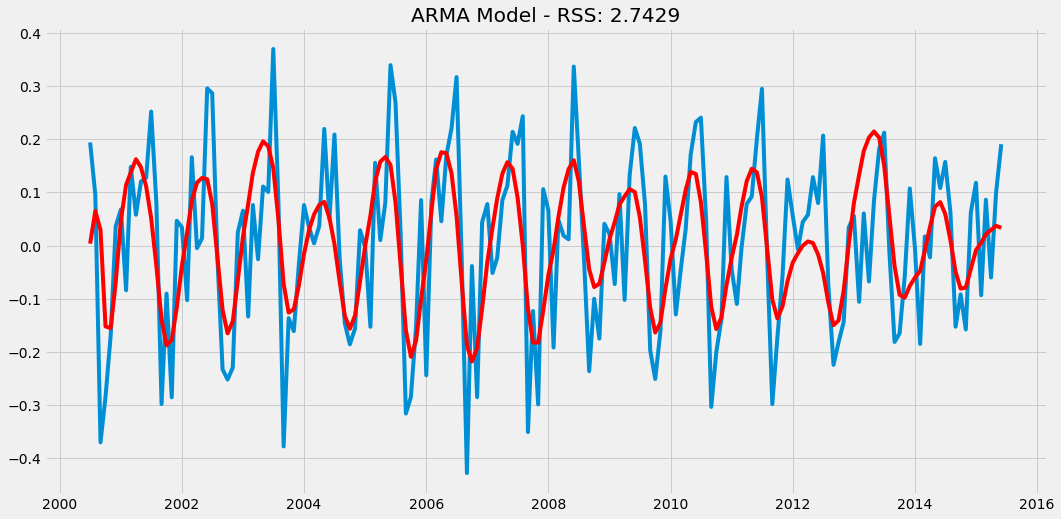

In [77]:
from statsmodels.tsa.arima_model import ARMA

#Comparing the actual & predicted series by AR model and calculating the Residual Sum of Squares
plt.figure(figsize=(16,8))
df_shift.index.freq='MS'
model = ARMA(df_shift, order=(2,2)) #Using p=2, q=2
results = model.fit()
plt.plot(df_shift)            #Visualizing the actual series used for modelling
plt.plot(results.fittedvalues, color='red')
plt.title('ARMA Model - RSS: %.4f'% sum((results.fittedvalues-df_shift['Value'])**2))   #calculate the residual sum of squares
plt.show()  

In [78]:
#print results of model
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                  180
Model:                     ARMA(2, 2)   Log Likelihood                 122.628
Method:                       css-mle   S.D. of innovations              0.121
Date:                Fri, 22 Jan 2021   AIC                           -233.256
Time:                        03:37:38   BIC                           -214.099
Sample:                    07-01-2000   HQIC                          -225.489
                         - 06-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0036      0.003      1.386      0.166      -0.001       0.009
ar.L1.Value     1.6501      0.035     46.507      0.000       1.581       1.720
ar.L2.Value    -0.9165      0.033    -27.405    

### Plot Forecast Diagnostics

In [79]:
#Printing the fitted values
predictions=pd.Series(results.fittedvalues)
predictions

YYYYMM
2000-07-01    0.003604
2000-08-01    0.064858
2000-09-01    0.029231
2000-10-01   -0.151939
2000-11-01   -0.155011
                ...   
2015-02-01    0.005182
2015-03-01    0.021111
2015-04-01    0.029484
2015-05-01    0.037092
2015-06-01    0.033297
Freq: MS, Length: 180, dtype: float64

**Observations:**<br>
<br>
- We can see that by using ARMA model, we get RSS = 2.7429, which is lesser than both AR and MA models.<br>
- We can also see that the AIC value is much smaller with the ARMA model at -233.256 and the p values of the coefficients are all 0.00 the lowest they have been yet.<br>
- Since ARMA model gives us the best RSS, we will forecast the values using ARMA.

### Inverse Transformation

Since we now have the fitted values by ARMA model, we will use the inverse transformation to get the original values.

In [80]:
#First step - doing cumulative sum
predictions_cumsum = predictions.cumsum()    #Use the predicted values series
predictions_cumsum

YYYYMM
2000-07-01    0.003604
2000-08-01    0.068462
2000-09-01    0.097692
2000-10-01   -0.054247
2000-11-01   -0.209258
                ...   
2015-02-01    0.801818
2015-03-01    0.822929
2015-04-01    0.852413
2015-05-01    0.889506
2015-06-01    0.922803
Freq: MS, Length: 180, dtype: float64

In [81]:
#Second step - Adding the first value of the log series to the cumulative sum values
predictions_log = pd.Series(df_log['Value'].iloc[0], index=df_log.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value=0)   #Use the series with cumulative sum
predictions_log

YYYYMM
2000-06-01    3.344980
2000-07-01    3.348584
2000-08-01    3.413442
2000-09-01    3.442672
2000-10-01    3.290733
                ...   
2015-02-01    4.146798
2015-03-01    4.167909
2015-04-01    4.197393
2015-05-01    4.234486
2015-06-01    4.267782
Length: 181, dtype: float64

In [82]:
#Third step - applying exponential transformation
predictions_ARMA = np.exp(predictions_log)       #Use the series with log values
predictions_ARMA

YYYYMM
2000-06-01    28.360000
2000-07-01    28.462394
2000-08-01    30.369587
2000-09-01    31.270406
2000-10-01    26.862545
                ...    
2015-02-01    63.231207
2015-03-01    64.580262
2015-04-01    66.512712
2015-05-01    69.026157
2015-06-01    71.363198
Length: 181, dtype: float64

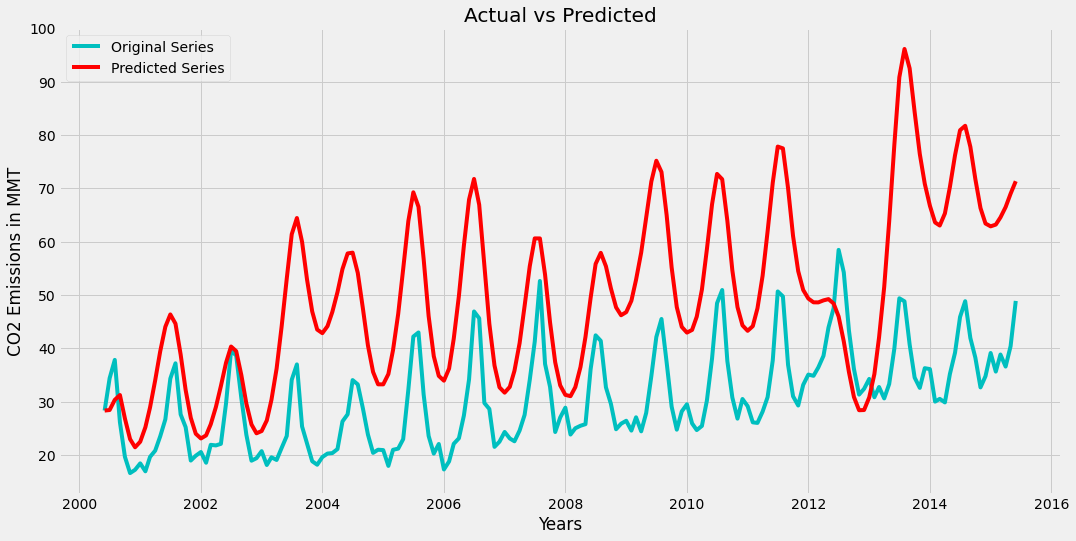

In [83]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(df_train, color = 'c', label = 'Original Series')
plt.plot(predictions_ARMA, color = 'r', label = 'Predicted Series')       #Use the series with predicted values
plt.title('Actual vs Predicted')
plt.xlabel("Years")
plt.ylabel("CO2 Emissions in MMT")
plt.legend()
plt.show()

**Observations:**
<br>
- We can see that the predicted series is showing higher values based on the training data we used. This could be a sign of overfitting the model. Let us forecast the CO2 emissions for the next 12 months.

### Forecasting the values for next 24 months and compare it with test data

In order to forecast the values for next 24 months, we need to follow these steps:<br>
<br>
1. Forecast the fitted values for next 12 months.<br>
2. Make a list of these 12 months (2016-2017) forecasted values.<br>
3. Convert that list into a series so that we can work with pandas functions.<br>
4. Make a dataframe where we have the dates starting from 2016-07-01 to 2017-07-01 as the index and the respective predicted cumulative sum values.<br>
5. Add the the last value of the df_log series in the same dataframe.<br>
6. Applying the inverse tranformation and get the forecasted values.

In [84]:
#Forecasting the values for next 12 months
forecasted_ARMA = results.forecast(steps=13) # here steps represent the number of months
forecasted_ARMA[0]

array([-0.00175043, -0.04282967, -0.06810672, -0.072167  , -0.05570082,
       -0.02480964,  0.01107153,  0.04196625,  0.06005986,  0.06160095,
        0.04756147,  0.02298322, -0.00470529])

In [85]:
# Creating a list containing all the forecasted value
list1 = forecasted_ARMA[0].tolist()
series1 = pd.Series(list1)
series1

0    -0.001750
1    -0.042830
2    -0.068107
3    -0.072167
4    -0.055701
5    -0.024810
6     0.011072
7     0.041966
8     0.060060
9     0.061601
10    0.047561
11    0.022983
12   -0.004705
dtype: float64

In [86]:
cumsum1 = series1.cumsum()
cumsum1

0    -0.001750
1    -0.044580
2    -0.112687
3    -0.184854
4    -0.240555
5    -0.265364
6    -0.254293
7    -0.212327
8    -0.152267
9    -0.090666
10   -0.043104
11   -0.020121
12   -0.024826
dtype: float64

In [87]:
#Making a new dataframe to get the additional dates from July 2016 to July 2017
index = pd.date_range('2016-07-01','2017-08-01' , freq='1M')
df1 = pd.DataFrame()
df1['cumsum1'] = cumsum1
df1.index = index
df1

cumsum1
2016-07-31 -0.001750
2016-08-31 -0.044580
2016-09-30 -0.112687
2016-10-31 -0.184854
2016-11-30 -0.240555
2016-12-31 -0.265364
2017-01-31 -0.254293
2017-02-28 -0.212327
2017-03-31 -0.152267
2017-04-30 -0.090666
2017-05-31 -0.043104
2017-06-30 -0.020121
2017-07-31 -0.024826

In [88]:
df_log.tail()

Value
YYYYMM              
2015-02-01  3.574254
2015-03-01  3.660274
2015-04-01  3.600321
2015-05-01  3.699819
2015-06-01  3.890186

In [89]:
#Adding the last term of the train log series in the cumulative values
df1['forecasted'] = df1['cumsum1'] + float(df_log.loc['2015-06-01'])
df1

cumsum1  forecasted
2016-07-31 -0.001750    3.888436
2016-08-31 -0.044580    3.845606
2016-09-30 -0.112687    3.777499
2016-10-31 -0.184854    3.705332
2016-11-30 -0.240555    3.649632
2016-12-31 -0.265364    3.624822
2017-01-31 -0.254293    3.635894
2017-02-28 -0.212327    3.677860
2017-03-31 -0.152267    3.737920
2017-04-30 -0.090666    3.799521
2017-05-31 -0.043104    3.847082
2017-06-30 -0.020121    3.870065
2017-07-31 -0.024826    3.865360

In [90]:
#Applying exponential transformation to the forecasted log values
forecasted_ARMA = np.exp(df1['forecasted'])
forecasted_ARMA

2016-07-31    48.834444
2016-08-31    46.787039
2016-09-30    43.706616
2016-10-31    40.663565
2016-11-30    38.460497
2016-12-31    37.518046
2017-01-31    37.935736
2017-02-28    39.561634
2017-03-31    42.010503
2017-04-30    44.679761
2017-05-31    46.856141
2017-06-30    47.945517
2017-07-31    47.720449
Freq: M, Name: forecasted, dtype: float64

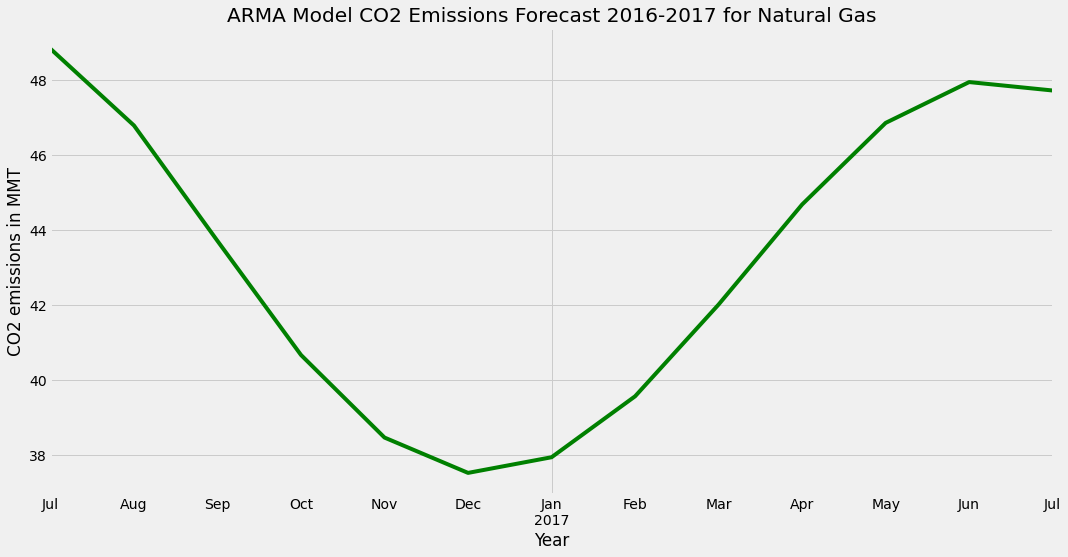

In [91]:
#plot forecast for 2016-2017
forecasted_ARMA.plot(figsize=(16,8),color="green")
plt.title("ARMA Model CO2 Emissions Forecast 2016-2017 for Natural Gas")
plt.xlabel("Year")
plt.ylabel("CO2 emissions in MMT")
plt.show()

In [92]:
#total CO2 emissions for next year
forecasted_ARMA.sum()

562.679948969898

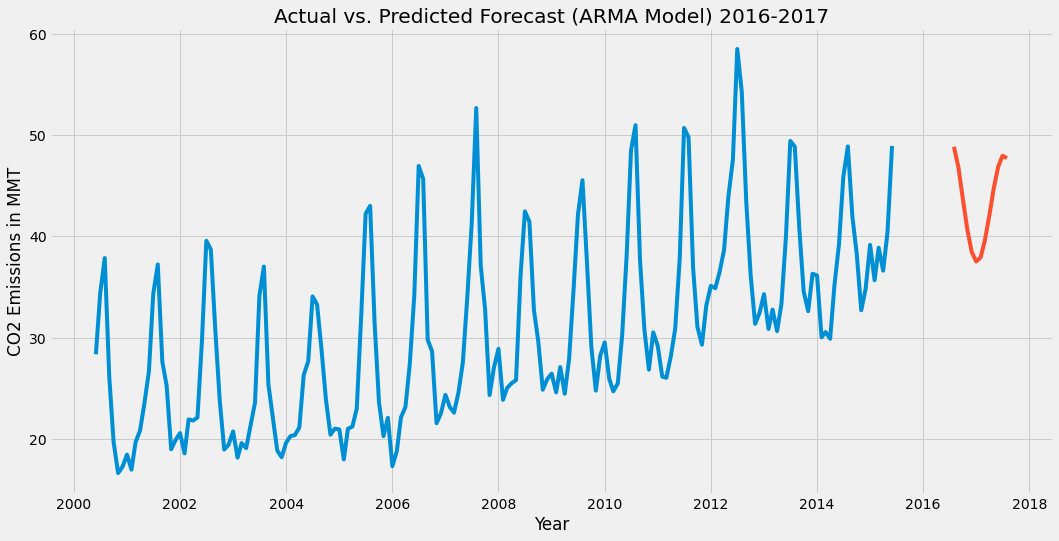

In [93]:
plt.figure(figsize = (16,8))
plt.plot(df_train)
plt.plot(forecasted_ARMA, label = 'predicted')
plt.title("Actual vs. Predicted Forecast (ARMA Model) 2016-2017")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions in MMT")
plt.show()

### ARMA Evaluation Metrics

In [94]:
#calculate mean squared error first
from sklearn.metrics import mean_squared_error
error = mean_squared_error(forecasted_ARMA, df_test, squared = False)
error
#now calculate RMSE
from math import sqrt
rmse = sqrt(error)
print('RMSE: %f' % rmse)


RMSE: 2.565255


In [95]:
#define function for MAPE calculation
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [96]:
mape(df_test,forecasted_ARMA)

14.676879239798932

In [97]:
#create accuracy df
d={'ARMA RMSE':[2.565], 'ARMA MAPE':[14.676]}
accuracy_df=pd.DataFrame(data=d,index=['Values'])

accuracy_df

ARMA RMSE  ARMA MAPE
Values      2.565     14.676

**Observations**
- The ARMA model has an RMSE of 2.565 and a MAPE of 14.676. This was our first model and the RMSE being low is a good sign of a decent model. Let's see if we can improve upon this with subsequent models.

# 2. SARIMA Model

First Run auto arima to find best values of p,q,d,P,Q,D

In [98]:
#Use auto arima to find best values for sarima model
#Finding the best values for p,q,d,P,Q,D

auto_arima(df_train['Value'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True).summary()         # set to stepwise 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=939.738, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=811.481, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=953.296, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=843.155, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=793.532, Time=0.98 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.47 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=894.076, Time=0.83 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=794.210, Time=1.15 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=793.977, Time=1.29 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=828.517, Time=0.88 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=795.897, Time=2.69 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=800.80

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  181
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -391.766
Date:                            Fri, 22 Jan 2021   AIC                            793.532
Time:                                    03:37:55   BIC                            809.181
Sample:                                         0   HQIC                           799.882
                                            - 181                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7123      0.236      3.024      0.002       0.251       1.174
ar.L1          0.6825      0.050     13.668      0.000       0.585       0.780
ar.S.L12      -0.5870      0.060     -9.758      0.000      -0.705      -0.469
ar.S.L24      -0.3404      0.079     -4.322      0.000      -0.495      -0.186
sigma2         5.8250      0.494     11.791      0.000       4.857       6.793
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                31.67
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.47
Prob(H) (two-sided):                  0.44   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Observations**:
Seen above in the auto arima result is the best AIC value obtained was 793.532 with an order of (1,0,0) and seasonal order of (2,1,0,12). We will use this for the SARIMA model building. 

### Now run SARIMA Model

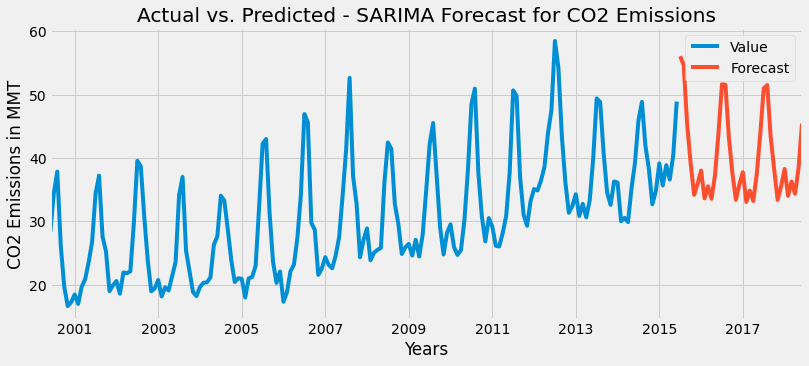

In [232]:
# Train and fit the SARIMA model 
model1 = model1 = SARIMAX(df_train['Value'],  
                        order = (1,0,0),  
                        seasonal_order =(2,1,0, 12)) #seasonal order based on auto arima model
sarima_fit = model1.fit() 
  
# Forecast for the next year + 2 for comparison
forecast1 = sarima_fit.predict(start = len(df_train),  
                          end = (len(df_train)-1) + 3 * 12,  
                          type = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df_train['Value'].plot(figsize = (12, 5), legend = True)
df_train.index.freq="MS"
forecast1.plot(legend = True) 

#title and labels of plot
plt.title('Actual vs. Predicted - SARIMA Forecast for CO2 Emissions')
plt.ylabel('CO2 Emissions in MMT')
plt.xlabel("Years")
plt.show();


In [234]:
#model results
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  181
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -396.400
Date:                            Fri, 22 Jan 2021   AIC                            800.801
Time:                                    05:38:35   BIC                            813.320
Sample:                                06-01-2000   HQIC                           805.882
                                     - 06-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7754      0.046     16.816      0.000       0.685       0.866
ar.S.L12      -0.5676      0.062     -9.187      0.000      -0.689      -0.447
ar.S.L24      -0.3129      0.080     -3.889      0.000      -0.471      -0.155
sigma2         6.1643      0.494     12.469      0.000       5.195       7.133
===================================================================================
Ljung-Box (L1) (Q):                   3.43   Jarque-Bera (JB):                29.66
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.46
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Observations**
- The p values are all 0.00 signifying exellent fit of the model. 
- The AIC is rather high at 800.801 so this may not be the best model. 
- Of note, the heterskedasticity is low at 1.25 signifying low variance and the skew is also low in the data. 
- Let's look at some other diagnostics on this model.

### Plot Diagnostics

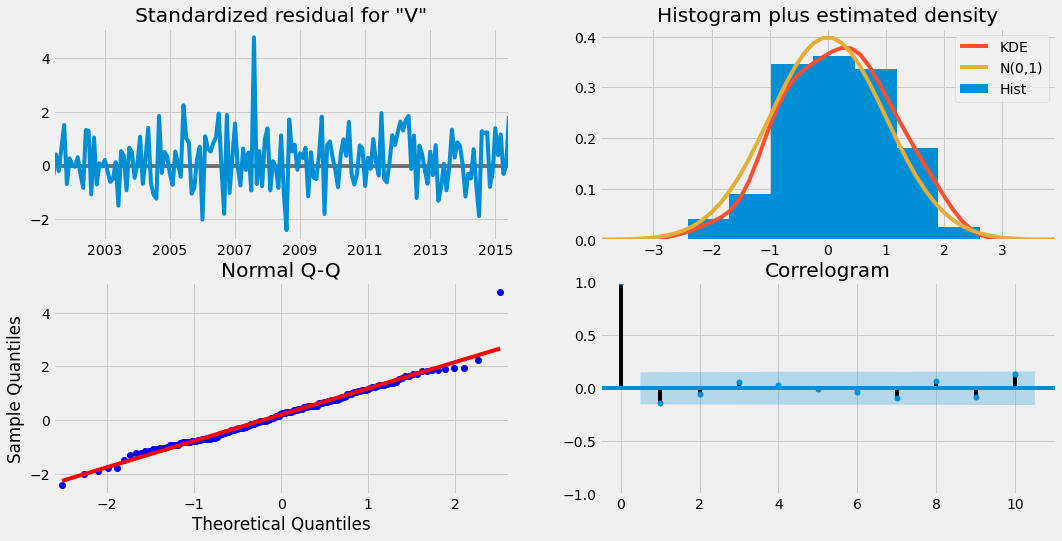

In [100]:
#plot diagnostics of SARIMA
sarima_fit.plot_diagnostics(figsize=(16,8));
plt.show()

**Observations**
- The Normal Q-Q plot shows all values are on the fitted line showing excellent fit of the model and autocorrelation in plotting.
- The correlogram shows all residuals are within the 95% confidence band again showing excellent fit of the model. 
- The Histogram puluse estimated density shows the values all fit under the curve.
- All residuals are between -2 and 2. 

#### Q-Q Plot shows excellent autocorrelation in the plotting.

In [101]:
#sarima model forecast
print(f'SARIMA Model Forecast')
forecast_values1 = sarima_fit.get_forecast(steps=25)
fv_df1 = forecast_values1.summary_frame()
fv_df1

SARIMA Model Forecast


Value            mean   mean_se  mean_ci_lower  mean_ci_upper
2015-07-01  56.079047  2.482802      51.212844      60.945250
2015-08-01  54.700283  3.141785      48.542499      60.858068
2015-09-01  45.311049  3.478430      38.493452      52.128647
2015-10-01  39.164859  3.665997      31.979637      46.350082
2015-11-01  34.190383  3.774294      26.792903      41.587864
2015-12-01  35.941693  3.837940      28.419469      43.463918
2016-01-01  38.025833  3.875707      30.429587      45.622078
2016-02-01  33.628903  3.898239      25.988496      41.269311
2016-03-01  35.545071  3.911725      27.878232      43.211910
2016-04-01  33.570719  3.919811      25.888031      41.253408
2016-05-01  37.305541  3.924665      29.613338      44.997743
2016-06-01  43.977875  3.927581      36.279958      51.675793
2016-07-01  51.654401  4.104157      43.610402      59.698400
2016-08-01  51.578292  4.206762      43.333189      59.823395
2016-09-01  43.182741  4.267270      34.819046      51.546437
2016-10-01  37.613719  4.303243      29.179518      46.047920
2016-11-01  33.409585  4.324729      24.933272      41.885897
2016-12-01  35.836352  4.337596      27.334819      44.337885
2017-01-01  37.775983  4.345315      29.259322      46.292645
2017-02-01  33.066466  4.349950      24.540721      41.592211
2017-03-01  34.863531  4.352734      26.332328      43.394734
2017-04-01  33.216989  4.354408      24.682507      41.751472
2017-05-01  37.468226  4.355414      28.931772      46.004679
2017-06-01  43.765548  4.356018      35.227909      52.303187
2017-07-01  50.992797  4.505977      42.161245      59.824349

In [102]:
#isolate 2016-2017 sarima forecast
sarima_fcast = fv_df1.tail(13)

sarima_fcast = sarima_fcast['mean']

sarima_fcast

2016-07-01    51.654401
2016-08-01    51.578292
2016-09-01    43.182741
2016-10-01    37.613719
2016-11-01    33.409585
2016-12-01    35.836352
2017-01-01    37.775983
2017-02-01    33.066466
2017-03-01    34.863531
2017-04-01    33.216989
2017-05-01    37.468226
2017-06-01    43.765548
2017-07-01    50.992797
Freq: MS, Name: mean, dtype: float64

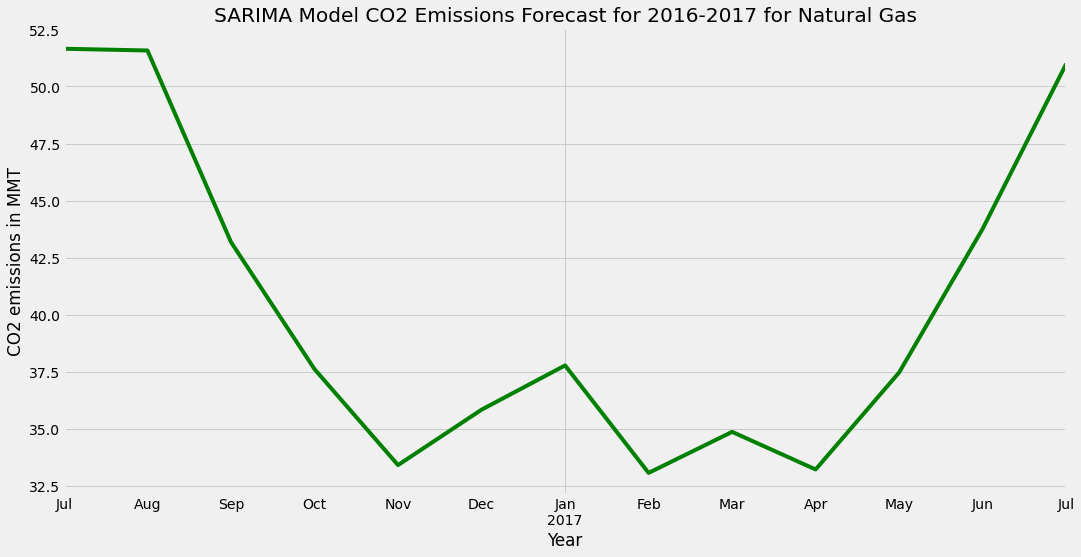

In [103]:
#plot 2016-2017 forecast for sarima model
sarima_fcast.plot(figsize=(16,8),color="green")
plt.title("SARIMA Model CO2 Emissions Forecast for 2016-2017 for Natural Gas")
plt.xlabel("Year")
plt.ylabel("CO2 emissions in MMT")
plt.show();

In [104]:
#total CO2 emissions for next year
sarima_fcast.sum()

524.4246304410501

In [220]:
print('SARIMA Model Forecast: Predicted Mean')
pred_mean1 = pd.DataFrame(forecast_values1.predicted_mean)
pred_mean1

SARIMA Model Forecast: Predicted Mean


predicted_mean
2015-07-01       56.079047
2015-08-01       54.700283
2015-09-01       45.311049
2015-10-01       39.164859
2015-11-01       34.190383
2015-12-01       35.941693
2016-01-01       38.025833
2016-02-01       33.628903
2016-03-01       35.545071
2016-04-01       33.570719
2016-05-01       37.305541
2016-06-01       43.977875
2016-07-01       51.654401
2016-08-01       51.578292
2016-09-01       43.182741
2016-10-01       37.613719
2016-11-01       33.409585
2016-12-01       35.836352
2017-01-01       37.775983
2017-02-01       33.066466
2017-03-01       34.863531
2017-04-01       33.216989
2017-05-01       37.468226
2017-06-01       43.765548
2017-07-01       50.992797

In [221]:
print(f'SARIMA Model Predicted Mean Sum by Year')
pred_mean1.resample('Y').sum()

SARIMA Model Predicted Mean Sum by Year


predicted_mean
2015-12-31      265.387316
2016-12-31      475.329032
2017-12-31      271.149541

In [222]:
#get confidence interval
forecast_ci1 = forecast_values1.conf_int(alpha=.05)
forecast_ci1.head()

lower Value  upper Value
2015-07-01    51.212844    60.945250
2015-08-01    48.542499    60.858068
2015-09-01    38.493452    52.128647
2015-10-01    31.979637    46.350082
2015-11-01    26.792903    41.587864

In [218]:
print(f'SARIMA Model Forecast Upper and Lower CO2 Emissions Confidence Interval')
conf_int1 = forecast_values1.conf_int(alpha=.05)
conf_int1

SARIMA Model Forecast Upper and Lower CO2 Emissions Confidence Interval


lower Value  upper Value
2015-07-01    51.212844    60.945250
2015-08-01    48.542499    60.858068
2015-09-01    38.493452    52.128647
2015-10-01    31.979637    46.350082
2015-11-01    26.792903    41.587864
2015-12-01    28.419469    43.463918
2016-01-01    30.429587    45.622078
2016-02-01    25.988496    41.269311
2016-03-01    27.878232    43.211910
2016-04-01    25.888031    41.253408
2016-05-01    29.613338    44.997743
2016-06-01    36.279958    51.675793
2016-07-01    43.610402    59.698400
2016-08-01    43.333189    59.823395
2016-09-01    34.819046    51.546437
2016-10-01    29.179518    46.047920
2016-11-01    24.933272    41.885897
2016-12-01    27.334819    44.337885
2017-01-01    29.259322    46.292645
2017-02-01    24.540721    41.592211
2017-03-01    26.332328    43.394734
2017-04-01    24.682507    41.751472
2017-05-01    28.931772    46.004679
2017-06-01    35.227909    52.303187
2017-07-01    42.161245    59.824349

In [219]:
print(f'Yearly Totals for Lower and Upper CO2 Emissions Forecast for SARIMA')
conf_int1.resample('Y').sum()

Yearly Totals for Lower and Upper CO2 Emissions Forecast for SARIMA


lower Value  upper Value
2015-12-31   225.440803   305.333829
2016-12-31   379.287888   571.370176
2017-12-31   211.135804   331.163278

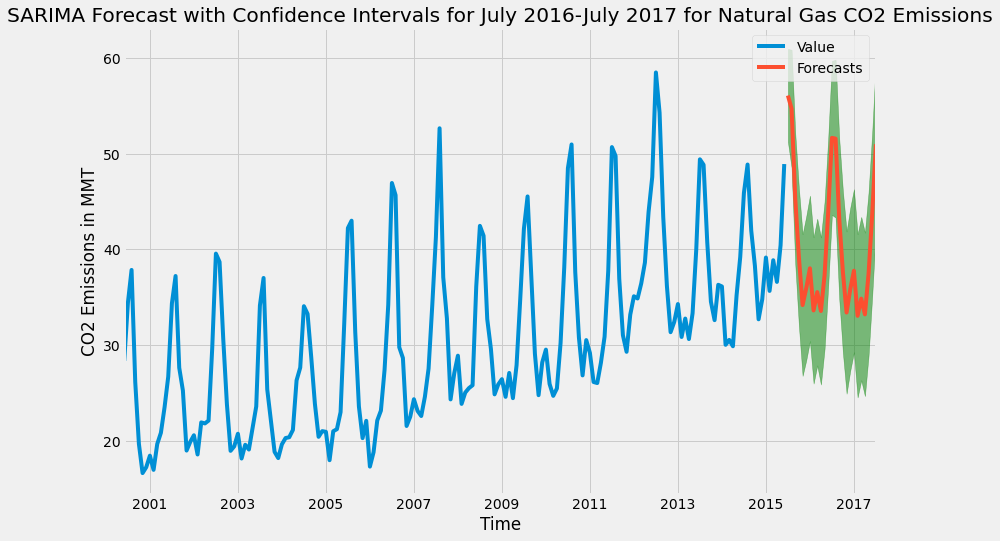

In [226]:
#plot confidence intervals
ax = df_train.plot(figsize=(12,8))

#Plot the Forecasted Values
forecast_values1.predicted_mean.plot(ax=ax,label='Forecasts')

#Plot the confidence Intervals
ax.fill_between(forecast_ci1.index,
                forecast_ci1.iloc[:,0],
                forecast_ci1.iloc[:,1],color='g',alpha=.5)

#axes labels and titles
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emissions in MMT')
ax.set_title('SARIMA Forecast with Confidence Intervals for July 2016-July 2017 for Natural Gas CO2 Emissions')

plt.legend()
plt.show()

### Evaluation Metrics

In [105]:
#calculate mean squared error first
from sklearn.metrics import mean_squared_error
error2 = mean_squared_error(sarima_fcast, df_test, squared = False)
error2
#now calculate RMSE
from math import sqrt
rmse = sqrt(error2)
print('RMSE: %f' % rmse)


RMSE: 2.640754


In [106]:
#function for mape
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [107]:
#mape result
mape(df_test,sarima_fcast)

20.17566642703531

In [108]:
#add to accuracy_df
accuracy_df.insert(2,'SARIMA RMSE',[2.641])
accuracy_df.insert(3,'SARIMA MAPE',[20.176])

accuracy_df



ARMA RMSE  ARMA MAPE  SARIMA RMSE  SARIMA MAPE
Values      2.565     14.676        2.641       20.176

In [109]:
#early view of first 2 models
accuracy_df.T

Values
ARMA RMSE     2.565
ARMA MAPE    14.676
SARIMA RMSE   2.641
SARIMA MAPE  20.176

**Observations so far**:
- ARMA is performing better with a lower RMSE and lower MAPE. 
- Both models are showing the forecast for 2016-2017 as a U shape with a dip in CO2 emissions during the winter months and a rise in the summer and spring.
- Interesting finding is the SARIMA model predicts lower overall CO2 emissions for the next year at 524.42 compared to the ARMA model which predicts 562.68 for the next year, yet the SARIMA model shows a higher range of CO2 emissions than the ARMA model.

# 3. Triple Exponential Smoothing

We will use the Holt Winters Model as it is excellent at handling seasonality and trend which this data has significant trend and seasonality. 

In [110]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(df_train['Value'],trend='add',seasonal='add',seasonal_periods=12,freq="MS").fit()
test_predictions = triple_model.forecast(25).rename('TES Forecast')

In [111]:
#print predictions
print(test_predictions)

2015-07-01    57.079949
2015-08-01    58.443124
2015-09-01    47.944867
2015-10-01    42.732345
2015-11-01    38.270739
2015-12-01    40.025785
2016-01-01    40.825110
2016-02-01    38.500655
2016-03-01    40.028335
2016-04-01    40.190342
2016-05-01    43.373273
2016-06-01    49.542890
2016-07-01    58.450841
2016-08-01    59.814016
2016-09-01    49.315759
2016-10-01    44.103237
2016-11-01    39.641631
2016-12-01    41.396677
2017-01-01    42.196002
2017-02-01    39.871547
2017-03-01    41.399227
2017-04-01    41.561234
2017-05-01    44.744165
2017-06-01    50.913782
2017-07-01    59.821733
Freq: MS, Name: TES Forecast, dtype: float64


In [112]:
#get forecast for 2016-2017 CO2 emissions
exp_smooth = test_predictions.tail(13)

exp_smooth

2016-07-01    58.450841
2016-08-01    59.814016
2016-09-01    49.315759
2016-10-01    44.103237
2016-11-01    39.641631
2016-12-01    41.396677
2017-01-01    42.196002
2017-02-01    39.871547
2017-03-01    41.399227
2017-04-01    41.561234
2017-05-01    44.744165
2017-06-01    50.913782
2017-07-01    59.821733
Freq: MS, Name: TES Forecast, dtype: float64

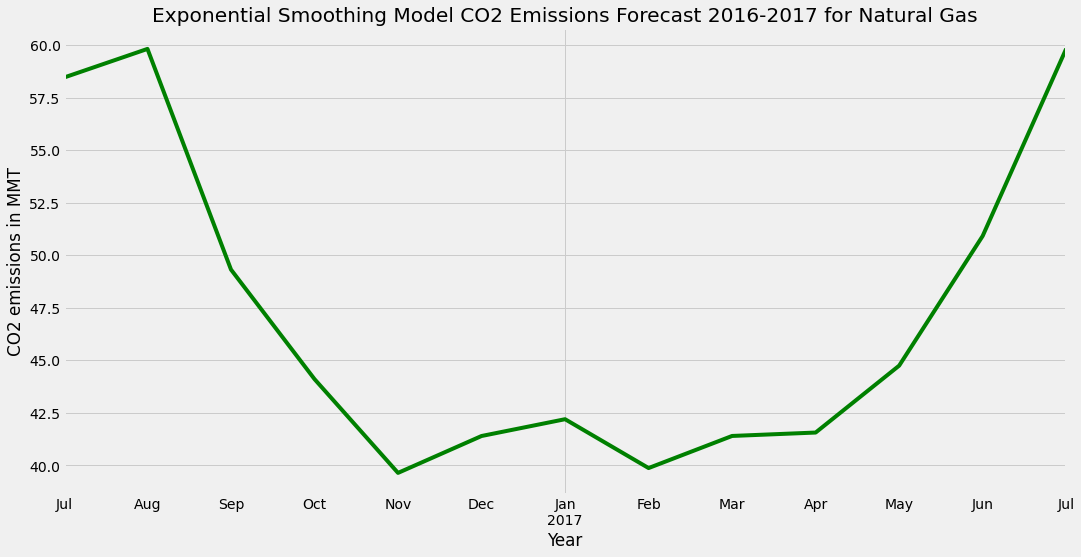

In [113]:
#plot exponential smoothing forecast 2016-2017
exp_smooth.plot(figsize=(16,8),color="green")
plt.title("Exponential Smoothing Model CO2 Emissions Forecast 2016-2017 for Natural Gas")
plt.xlabel("Year")
plt.ylabel("CO2 emissions in MMT")
plt.show();

In [114]:
#total CO2 emissions for next year
exp_smooth.sum()

613.2298521334675

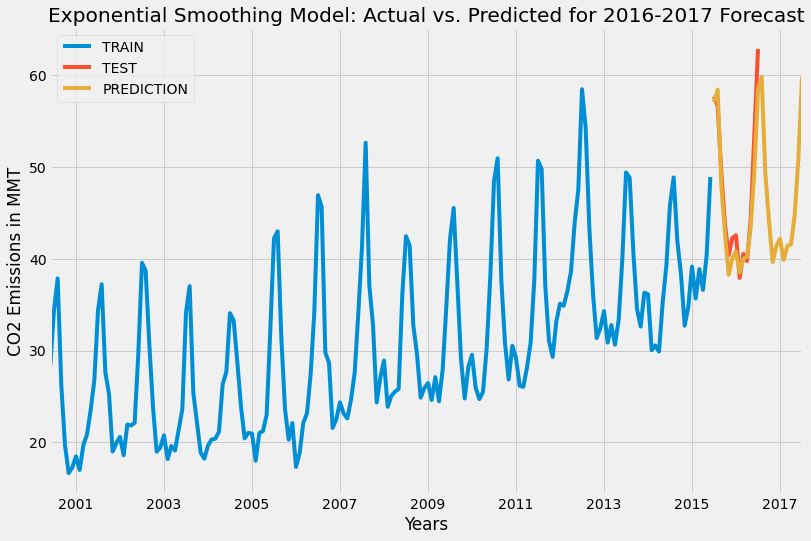

In [115]:
#plot predictions
df_train['Value'].plot(legend=True,label='TRAIN')
df_test['Value'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Exponential Smoothing Model: Actual vs. Predicted for 2016-2017 Forecast')
plt.xlabel('Years')
plt.ylabel("CO2 Emissions in MMT")
plt.show();

### Evaluation Metrics

In [116]:
#calculate mean squared error first
from sklearn.metrics import mean_squared_error
error3 = mean_squared_error(exp_smooth, df_test, squared = False)
error3
#now calculate RMSE
from math import sqrt
rmse = sqrt(error3)
print('RMSE: %f' % rmse)

RMSE: 1.295597


In [117]:
#mape test
mape(df_test,exp_smooth)

17.511279939321835

In [118]:
#add to accuracy_df
accuracy_df.insert(2,'Exp Smooth RMSE',[1.296])
accuracy_df.insert(3,'Exp Smooth MAPE',[17.511])

accuracy_df


ARMA RMSE  ARMA MAPE  ...  SARIMA RMSE  SARIMA MAPE
Values      2.565     14.676  ...        2.641       20.176

[1 rows x 6 columns]

**Observations so far**:
- Exponential Smoothing now has shown a higher overall total for CO2 emissions for 2016-2017 at 613.229 more than the previous 2 models. 
- The RMSE is the lowest it has been at 1.296 for the Exponential Smoothing Model, the MAPE is 17.511 and higher than the ARMA model but lower than the SARIMA model.
- The range of CO2 emissions in the forecast for 2016-2017 is the same for SARIMA, 20 as compared to 10 for the ARMA. The maximum value for the CO2 emission forecast for Exponential Smoothing is the highest at 59.8 in August 2016 and July 2017. 

## 4. Prophet Model

In [119]:
#install pystan and fbprophet
!pip install pystan
!pip install fbprophet

In [120]:
df_pr = df_train.copy()
df_pr = df_train.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True, changepoint_range=0.95, changepoint_prior_scale= 0.080  )
m.fit(df_pr)
future = m.make_future_dataframe(periods=26,freq='M')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      trend  ...  multiplicative_terms_upper       yhat
202 2017-03-31  43.330685  ...                         0.0  36.861141
203 2017-04-30  43.433242  ...                         0.0  40.086291
204 2017-05-31  43.539217  ...                         0.0  46.539702
205 2017-06-30  43.641774  ...                         0.0  56.649866
206 2017-07-31  43.747750  ...                         0.0  61.513407

[5 rows x 16 columns]

In [121]:
#get forecast
forecastdf = prophet_pred[['ds','trend','yhat','yhat_lower','yhat_upper']]
forecastdf.tail(24)

forecastdf = pd.DataFrame(forecastdf)
forecastdf

#change names and set index
forecastdf = forecastdf.rename(columns={'ds':'Month','trend':'Trend','yhat':'Predicted Value','yhat_lower':'Lower_Prediction','yhat_upper':'Upper_Prediction'})

#set index
forecastdf.set_index('Month',inplace=True)

#forecastdf
forecastdf

Trend  Predicted Value  Lower_Prediction  Upper_Prediction
Month                                                                     
2000-06-01  23.651396        27.780799         23.019502         32.946168
2000-07-01  23.690767        35.833014         30.455292         40.703691
2000-08-01  23.731449        35.705034         30.837581         40.874386
2000-09-01  23.772132        27.314942         22.001800         32.224583
2000-10-01  23.811503        21.761961         16.859933         26.626599
...               ...              ...               ...               ...
2017-03-31  43.330685        36.861141         32.211109         41.655981
2017-04-30  43.433242        40.086291         35.730493         45.046935
2017-05-31  43.539217        46.539702         41.878749         51.620519
2017-06-30  43.641774        56.649866         51.562921         61.642446
2017-07-31  43.747750        61.513407         56.836400         66.533219

[207 rows x 4 columns]

In [122]:
#monthly co2 emissions predictions for prophet
resamp_month_prophet = forecastdf.resample('M').sum()
resamp_month_prophet.tail(13)

Trend  Predicted Value  Lower_Prediction  Upper_Prediction
Month                                                                     
2016-07-31  42.499973        59.135109         54.339590         64.167027
2016-08-31  42.605949        44.594810         39.644172         49.493526
2016-09-30  42.708505        39.972943         34.805617         44.855903
2016-10-31  42.814481        34.623426         29.862469         39.842638
2016-11-30  42.917038        37.317066         32.965866         42.300741
2016-12-31  43.023014        39.639587         35.087060         44.648766
2017-01-31  43.128989        38.462151         33.696733         43.135104
2017-02-28  43.224709        36.044584         31.211475         41.324132
2017-03-31  43.330685        36.861141         32.211109         41.655981
2017-04-30  43.433242        40.086291         35.730493         45.046935
2017-05-31  43.539217        46.539702         41.878749         51.620519
2017-06-30  43.641774        56.649866         51.562921         61.642446
2017-07-31  43.747750        61.513407         56.836400         66.533219

In [123]:
#get forecast for 2016-2017
prophet_co2 = resamp_month_prophet['Predicted Value'].tail(13)

prophet_co2

Month
2016-07-31    59.135109
2016-08-31    44.594810
2016-09-30    39.972943
2016-10-31    34.623426
2016-11-30    37.317066
2016-12-31    39.639587
2017-01-31    38.462151
2017-02-28    36.044584
2017-03-31    36.861141
2017-04-30    40.086291
2017-05-31    46.539702
2017-06-30    56.649866
2017-07-31    61.513407
Freq: M, Name: Predicted Value, dtype: float64

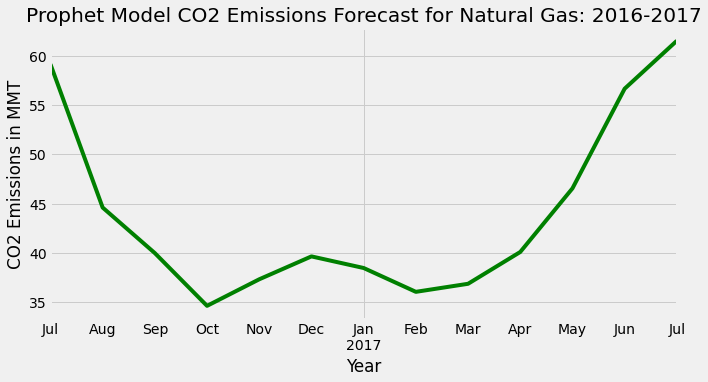

In [228]:
#plot 2016-2017 CO2 emissions forecast
prophet_co2.plot(figsize=(10,5),color="green")
plt.title("Prophet Model CO2 Emissions Forecast for Natural Gas: 2016-2017")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions in MMT")
plt.show();

In [125]:
#CO2 total forecast for next year
prophet_co2.sum()

571.4400834517845

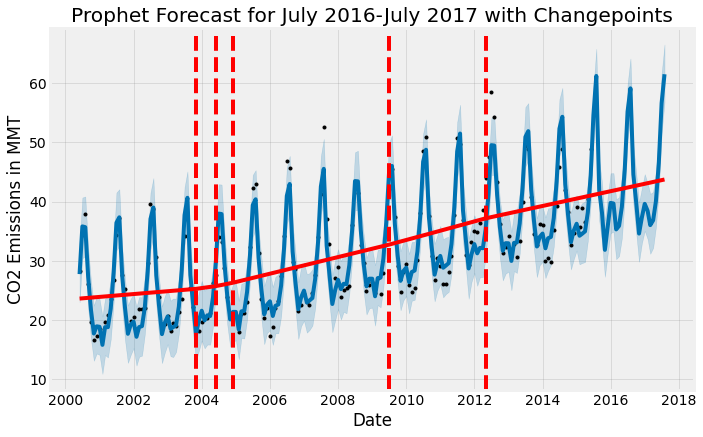

In [215]:
#plot predictions with changepoints

from fbprophet.plot import add_changepoints_to_plot
fig1 = m.plot(prophet_pred)
a = add_changepoints_to_plot(fig1.gca(), m, prophet_pred)
plt.title("Prophet Forecast for July 2016-July 2017 with Changepoints")
plt.xlabel("Date")
plt.ylabel("CO2 Emissions in MMT")
plt.show();

**Observations**
- In this plot we can see multiple changepoints detected leading up to the forecast. This actually shows more changepoints than we found in our exploratory data analysis. 
- During Prophet model building I used the changepoint_range parameter to account for at least 95% of the changepoints so I am positive the model accounted for these during fitting.

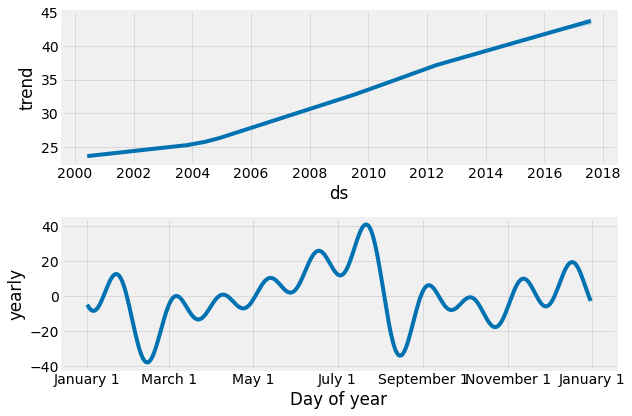

In [231]:
#plot trend
fig2 = m.plot_components(prophet_pred)

**Observations**
-The Trend in the Prophet Model shows the exponential growth that has continued in CO2 emissions.
- The yearly trend in CO2 emissions is the same as seen in the 2016-2017 forecast in that CO2 emissions are higher in spring and summer and lower in fall and winter.

### Evaluation Metrics

In [128]:
#calculate mean squared error first
from sklearn.metrics import mean_squared_error
error4 = mean_squared_error(prophet_co2, df_test, squared = False)
error4
#now calculate RMSE
from math import sqrt
rmse = sqrt(error4)
print('RMSE: %f' % rmse)

RMSE: 2.333264


In [129]:
#mape test
mape(df_test,prophet_co2)

19.882339696878084

In [130]:
#add to accuracy_df
accuracy_df.insert(2,'Prophet RMSE',[2.328])
accuracy_df.insert(3,'Prophet MAPE',[19.762])

accuracy_df

ARMA RMSE  ARMA MAPE  ...  SARIMA RMSE  SARIMA MAPE
Values      2.565     14.676  ...        2.641       20.176

[1 rows x 8 columns]

**Observations**
- The model with the best RMSE so far is Exponential Smoothing at 1.296. Interesting is that the other 3 models (SARIMA, ARMA, Prophet) all have RMSE's that are similar ranging from 2.3 to 2.6.
- The MAPE remains the lowest for the ARMA model. 
- The Prophet model was most interesting in that it had the highest range in the predictions from a maximum of 61.51 to a low of 34.62. The range is 27 for the year 2016-2017. 
- The difference between the Prophet models and the other models is that changepoint detection is a parameter included in the model. I made sure the model detected the changepoints at the approximate locations in the training data. This ultimately could have influenced the forecast outcome. 

In [131]:
#examine natural gas totals for last 5 years
gas.Value.resample('Y').sum().tail()

YYYYMM
2012-12-31    492.684
2013-12-31    444.358
2014-12-31    443.569
2015-12-31    529.767
2016-12-31    321.430
Freq: A-DEC, Name: Value, dtype: float64

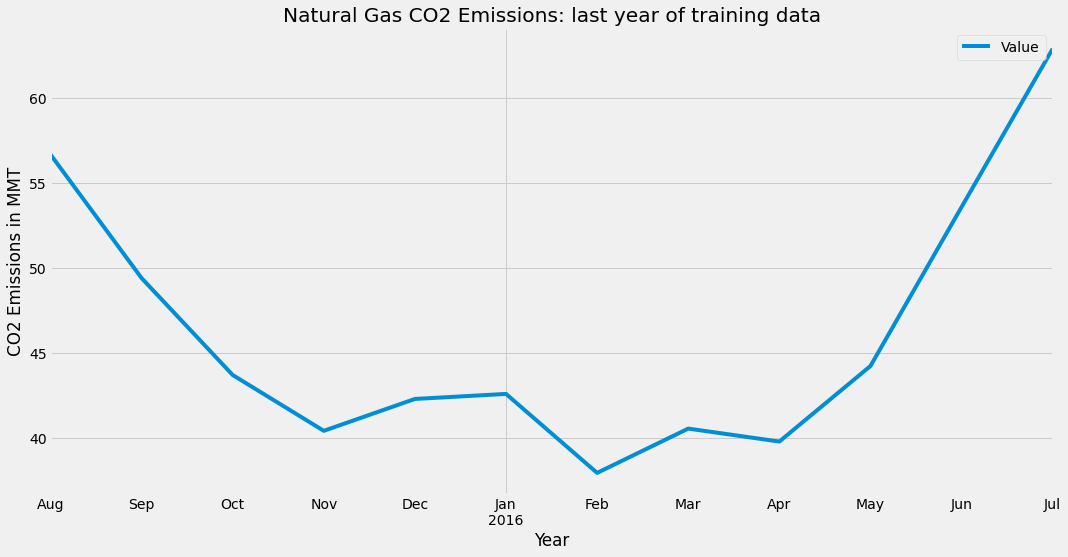

In [132]:
#plot last year of training data
gas.tail(12).plot(figsize=(16,8))
plt.title("Natural Gas CO2 Emissions: last year of training data")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions in MMT")
plt.show();

In [133]:
#final accuracy dataframe
accuracy_df.T

Values
ARMA RMSE         2.565
ARMA MAPE        14.676
Prophet RMSE      2.328
Prophet MAPE     19.762
Exp Smooth RMSE   1.296
Exp Smooth MAPE  17.511
SARIMA RMSE       2.641
SARIMA MAPE      20.176

In [134]:
#Sum of natural gas CO2 emissions per year in data set
gas['Value'].tail(31).resample('Y').sum()

YYYYMM
2014-12-31    443.569
2015-12-31    529.767
2016-12-31    321.430
Freq: A-DEC, Name: Value, dtype: float64

## Modeling Summary So far: 
- The model with the best overall RMSE accuracy metric is Triple Exponential Smoothing at 1.296. 
- The model with the best MAPE (lowest mean absolute percentage error) is ARMA at 14.676, followed by Exponential Smoothing with an MAPE of 17.511. 
- I would say overall the best model so far is therefore the Exponential Smoothing model which makes sense as it takes into effect the constant seasonality and trend in the data.
- The models predicted a range of CO2 emissions for Natural Gas total for July 2016 to July 2017 with the highest yearly prediction being 613.229 by the Exponential Smoothing model, and the lowest prediction 524.42 by the SARIMA model. The Prophet model predicted 571.440 MMT and the ARMA model predicted 562.68 MMT in CO2 emissions for the next year. 
- The raw historical data for Natural Gas Emissions trend for CO2 emissions for the electricity sector for July to July is as follows (courtesy of EIA.gov):

* 2014-2015: 538.3
* 2015-2016: 607.8
* 2016-2017: 571.5
* 2017-2018: 609.6

- This is obviously different than the yearly totals. But for our purposes we will compare our predictions to that of the raw historical data which says that July 2016-2017 had a total of 571.5 MMT in CO2 emissions. Therefore our closest prediction to this is the Prophet Model at 571.440 MMT. 
- We now need to validate the models using cross validation.

# Cross Validation - Walk Forward/Sliding Window

- The next step is to perform Cross Validation using the Walk Forward or Sliding Window Technique on the Natural Gas Data.
- When we tune hyperparameters of a model, in order to figure out if the value of hyperparameters we choose is optimal or not, we have to run the model on the test data set. But if we use the test set more than once, then the information from test dataset "leaks" to the model. This leads to over-fitting the value of dependent variable. To avoid that, we use cross-validation.
- The purpose of cross validation is to train the models on data it has not seen before. Normally K-folds cross validation is used with machine learning models. However, time series validation must include folds that are successive or overlapping which is why the "Sliding Window" or "Forward Chaining" techniques are often used.
- We will use the "Sliding Window" with 3 successive folds to validate the models.


In [135]:
#import sklearn timeseries split
from sklearn.model_selection import TimeSeriesSplit

#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(gas)

<generator object TimeSeriesSplit.split at 0x7fe36af14f10>

In [136]:
#Find out no of observations in train and test sets
i=0
for train, test in tscv.split(gas):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train)))
    print ("No of observations under test%s=%s" % (i, len(test)))

No of observations under train1=133
No of observations under test1=130
No of observations under train2=263
No of observations under test2=130
No of observations under train3=393
No of observations under test3=130


In [137]:
#total sum of dataset
393+130

523

Now we will split the data into three training (train1, train2 and train3) and test sets (test1, test2 and test3) each using iloc function.

In [138]:
#Splitting according to the above description
train1, test1 = gas.iloc[:133, 0], gas.iloc[130:263, 0] 
train2, test2 = gas.iloc[:263, 0], gas.iloc[263:393, 0]
train3, test3 = gas.iloc[:393, 0], gas.iloc[393:523, 0]

So we now have different windows of the dataset in time series succession.

1. Triple Exponential Smoothing Cross Validation

In [139]:
#Fit Triple Exp Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

#First fold RMSE
model1_es = ExponentialSmoothing(train1, trend='add',seasonal='add', seasonal_periods=12,freq='MS').fit()
pred1_es = model1_es.predict(start=test1.index[0], end=test1.index[-1])
RMSE1_es=round(sqrt(mean_squared_error(test1, pred1_es)),2)
MAPE1_es = round(mape(test1,pred1_es),2)

#Second fold RMSE
model2_es = ExponentialSmoothing(train2, trend='add', seasonal='add', seasonal_periods=12,freq='MS').fit()
pred2_es = model2_es.predict(start=test2.index[0], end=test2.index[-1])
RMSE2_es=round(sqrt(mean_squared_error(test2, pred2_es)),2)
MAPE2_es = round(mape(test2, pred2_es),2)

#Third fold RMSE
model3_es = ExponentialSmoothing(train3, trend='add', seasonal='add', seasonal_periods=12,freq='MS').fit()
pred3_es = model3_es.predict(start=test3.index[0], end=test3.index[-1])
RMSE3_es=round(sqrt(mean_squared_error(test3, pred3_es)),2)
MAPE3_es= round(mape(test3, pred3_es),2)

print ("RMSE1 for Triple Exp Smoothing:", RMSE1_es)
print ("RMSE2 for Triple Exp Smoothing:", RMSE2_es)
print ("RMSE3 for Triple Exp Smoothing:", RMSE3_es)

Overall_RMSE_es=round((RMSE1_es+RMSE2_es+RMSE3_es)/3,2)
print ("Overall RMSE for Triple Exp Smoothing:", Overall_RMSE_es) 
print(" ")
print(" ")
print ("MAPE1 for Triple Exp Smoothing:", MAPE1_es)
print("MAPE2 for Triple Exp Smoothing:", MAPE2_es)
print("MAPE3 for Triple Exp Smoothing:", MAPE3_es)

Overall_MAPE_es=round((MAPE1_es+MAPE2_es+MAPE3_es)/3,2)
print ("Overall MAPE for Triple Exp Smoothing:", Overall_MAPE_es) 

RMSE1 for Triple Exp Smoothing: 2.15
RMSE2 for Triple Exp Smoothing: 5.6
RMSE3 for Triple Exp Smoothing: 6.85
Overall RMSE for Triple Exp Smoothing: 4.87
 
 
MAPE1 for Triple Exp Smoothing: 11.93
MAPE2 for Triple Exp Smoothing: 18.28
MAPE3 for Triple Exp Smoothing: 13.58
Overall MAPE for Triple Exp Smoothing: 14.6


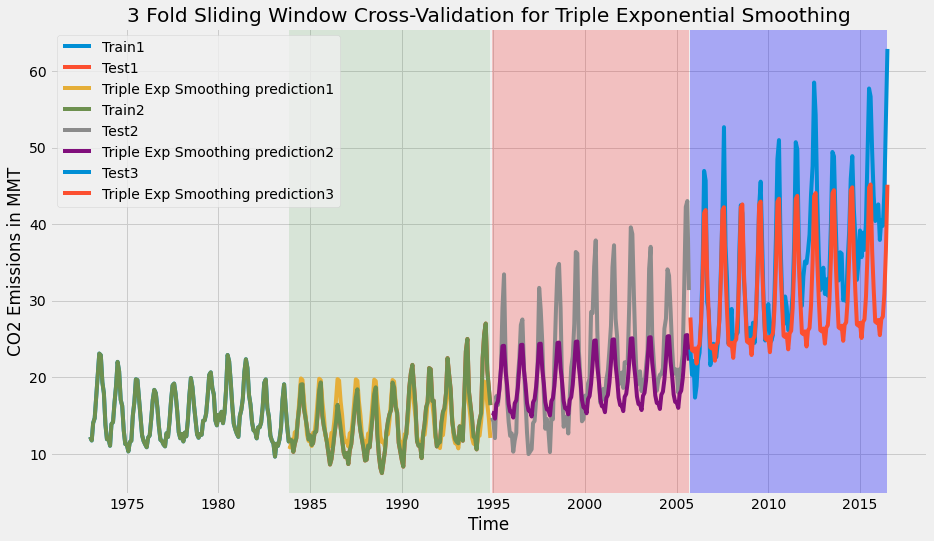

In [140]:
#plot
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

#Labels and titles
plt.xlabel("Time")
plt.ylabel("CO2 Emissions in MMT")
plt.title("3 Fold Sliding Window Cross-Validation for Triple Exponential Smoothing")

#First fold- CV
plt.plot(train1.index, train1, label='Train1')
plt.plot(test1.index, test1, label='Test1')
plt.plot(pred1_es.index, pred1_es, label='Triple Exp Smoothing prediction1')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test1.index[0], test1.index[-1],  facecolor='g', alpha=0.1)

#Second fold
plt.plot(train2.index, train2, label='Train2')
plt.plot(test2.index, test2, label='Test2')
plt.plot(pred2_es.index, pred2_es, label='Triple Exp Smoothing prediction2')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test2.index[0], test2.index[-1],  facecolor='r', alpha=0.2)

#Third fold
plt.plot(test3.index, test3, label='Test3')
plt.plot(pred3_es.index, pred3_es, label='Triple Exp Smoothing prediction3')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test3.index[0], test3.index[-1],  facecolor='b', alpha=0.3);

**Observations**
- It appears the first fold is predicting the same as the first test fold of data.
- It appears the second fold is predicting slightly less than the second test fold.
- It appears the third fold is predicting slightly less than the third test fold.

2. SARIMA Cross Validation

Before we perform crosss validation we will run the auto arima function to find the best parameters for the models to cross validate the data on.

In [141]:
#define function for auto arima hyperparameter search
#Use auto arima to find best values for sarima model
#Finding the best values for p,q,d,P,Q,D
def auto(x):
  auto_arima(x, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True).summary()         # set to stepwise 

In [142]:
#parameter search train1
auto(train1)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=289.309, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=432.884, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=295.733, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=355.670, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=437.478, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=311.630, Time=0.13 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=296.240, Time=0.37 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=3.85 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=288.868, Time=0.35 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=312.757, Time=0.08 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=289.422, Time=0.64 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=289.717, Time=1.72 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=29

For train1 the best parameters are: order=(1,0,0) and seasonal_order=(0,1,1,12)

In [143]:
#parameter search train 2
auto(train2)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=734.853, Time=0.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=841.978, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=778.567, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=753.272, Time=0.45 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=808.859, Time=0.26 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=735.029, Time=1.06 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=735.342, Time=1.90 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=758.672, Time=0.52 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.69 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=754.332, Time=0.46 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=735.840, Time=1.26 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=736.030, Time=1.10 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=755.423, Time=0.28 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=746.345, Time=0.68 sec
 ARIMA(2,1,0)(0,1,1)[12]             

The best parameters for train2 are: order=(2,1,2), seasonal_order=(0,1,1,12)

In [144]:
#parameter search for train3
auto(train3)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1412.527, Time=0.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1636.001, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1499.433, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1452.960, Time=0.50 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1547.769, Time=0.34 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1413.633, Time=1.10 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1413.649, Time=2.35 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1456.364, Time=0.46 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=5.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1461.880, Time=0.41 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1413.504, Time=1.73 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1413.152, Time=1.26 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1469.701, Time=0.29 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1419.490, Time=0.71 sec
 ARIMA(2,1,0)(0,1,1)[12]

The best fit for train3 is: order=(3,1,3), seasonal_order=(0,1,1,12)

In [145]:
#Fit SARIMA model

#First fold RMSE
model1_sarima = SARIMAX(train1, order = (1,0,0),  
                        seasonal_order =(0,1,1, 12),freq='MS').fit()
pred1_sarima = model1_sarima.predict(start=test1.index[0], end=test1.index[-1])
RMSE1_sarima=round(sqrt(mean_squared_error(test1, pred1_sarima)),2)
MAPE1_sarima = round(mape(test1,pred1_sarima),2)

#Second fold RMSE
model2_sarima = SARIMAX(train2, order=(2,1,2), seasonal_order=(0,1,1,12),freq='MS').fit()
pred2_sarima = model2_sarima.predict(start=test2.index[0], end=test2.index[-1])
RMSE2_sarima=round(sqrt(mean_squared_error(test2, pred2_sarima)),2)
MAPE2_sarima = round(mape(test2, pred2_sarima),2)

#Third fold RMSE
model3_sarima = SARIMAX(train3, order=(3,1,3), seasonal_order=(0,1,1,12),freq='MS').fit()
pred3_sarima = model3_sarima.predict(start=test3.index[0], end=test3.index[-1])
RMSE3_sarima=round(sqrt(mean_squared_error(test3, pred3_sarima)),2)
MAPE3_sarima= round(mape(test3, pred3_sarima),2)

print ("RMSE1 for SARIMA:", RMSE1_sarima)
print ("RMSE2 for SARIMA:", RMSE2_sarima)
print ("RMSE3 for SARIMA:", RMSE3_sarima)

Overall_RMSE_sarima=round((RMSE1_sarima+RMSE2_sarima+RMSE3_sarima)/3,2)
print ("Overall RMSE for SARIMA:", Overall_RMSE_sarima) 
print(" ")
print(" ")
print ("MAPE1 for SARIMA:", MAPE1_sarima)
print("MAPE2 for SARIMA:", MAPE2_sarima)
print("MAPE3 for SARIMA:", MAPE3_sarima)

Overall_MAPE_sarima=round((MAPE1_sarima+MAPE2_sarima+MAPE3_sarima)/3,2)
print ("Overall MAPE for SARIMA:", Overall_MAPE_sarima) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RMSE1 for SARIMA: 2.15
RMSE2 for SARIMA: 3.5
RMSE3 for SARIMA: 5.45
Overall RMSE for SARIMA: 3.7
 
 
MAPE1 for SARIMA: 12.08
MAPE2 for SARIMA: 14.05
MAPE3 for SARIMA: 10.67
Overall MAPE for SARIMA: 12.27


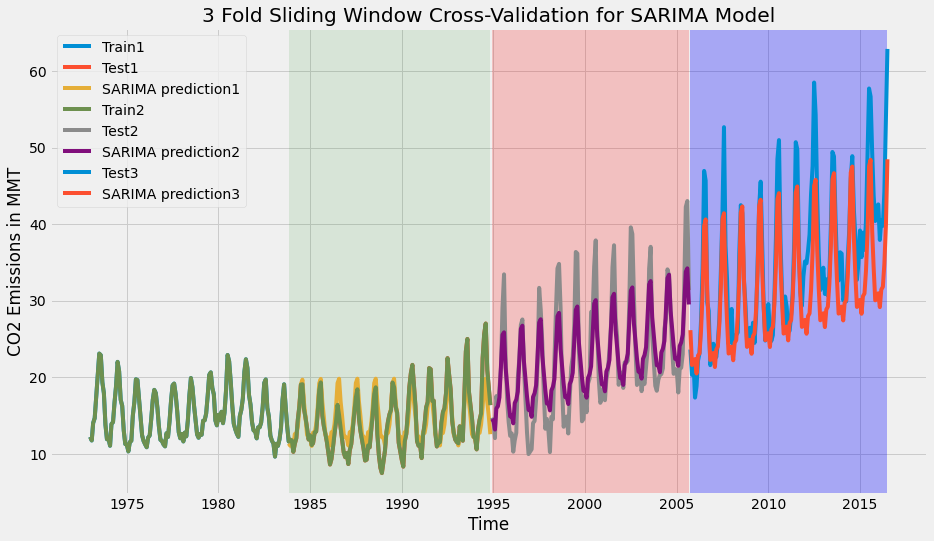

In [146]:
#plot CV for sarima
#Labels and titles
plt.xlabel("Time")
plt.ylabel("CO2 Emissions in MMT")
plt.title("3 Fold Sliding Window Cross-Validation for SARIMA Model")

#First fold- CV
plt.plot(train1.index, train1, label='Train1')
plt.plot(test1.index, test1, label='Test1')
plt.plot(pred1_sarima.index, pred1_sarima, label='SARIMA prediction1')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test1.index[0], test1.index[-1],  facecolor='g', alpha=0.1)

#Second fold
plt.plot(train2.index, train2, label='Train2')
plt.plot(test2.index, test2, label='Test2')
plt.plot(pred2_sarima.index, pred2_sarima, label='SARIMA prediction2')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test2.index[0], test2.index[-1],  facecolor='r', alpha=0.2)

#Third fold
plt.plot(test3.index, test3, label='Test3')
plt.plot(pred3_sarima.index, pred3_sarima, label='SARIMA prediction3')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test3.index[0], test3.index[-1],  facecolor='b', alpha=0.3);

**Observations**
- This cross validation shows us that it appears SARIMA is an overall better model than Triple Exponential Smoothing with an average RMSE of 3.69 and average MAPE of 12.24 compared to Exponential Smoothing which had an average RMSE of 4.87 and average MAPE of 14.6.
- The SARIMA model first, second and third predictions appear to be almost directly the same as the test folds just with slightly lower peaks. This is the best series of validation predictions we have seen so far.
- This makes sense since the data is very seasonal so SARIMA a seasonal model would work best. 

3. ARMA Cross Validation

First we will figure out the p,q values using the pacf_acf_plot function we wrote earlier.

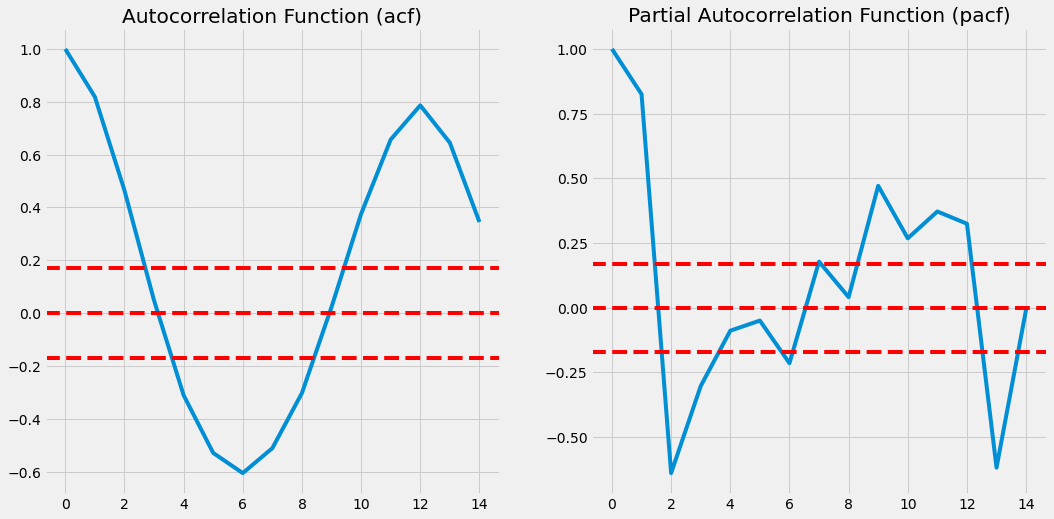

In [147]:
#train1
pacf_acf_plot(train1)

It appears the lowest values are 2 and 2 where it enters the confidence bands for train 1.

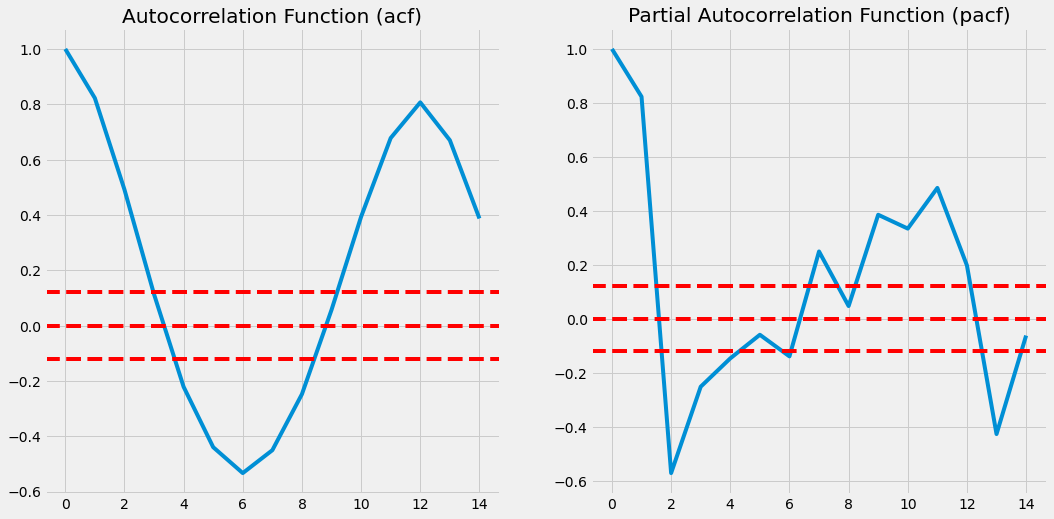

In [148]:
#train 2
pacf_acf_plot(train2)

For train 2 it appears it is 3, 2 where it enters the confidence bands.

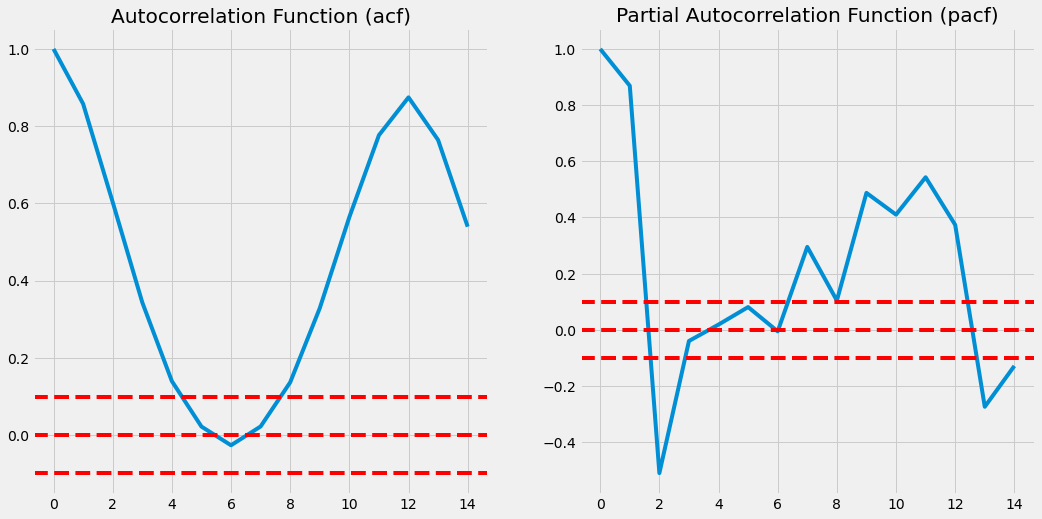

In [149]:
#train 3 pacf acf plot
pacf_acf_plot(train3)

For train3 it appears it is 4,2 where it enters the confidence bands.

In [150]:
#Fit ARMA model

#First fold RMSE
model1_arma = ARMA(train1, order=(2,2),freq='MS').fit()
pred1_arma = model1_arma.predict(start=test1.index[0], end=test1.index[-1])
RMSE1_arma=round(sqrt(mean_squared_error(test1, pred1_arma)),2)
MAPE1_arma = round(mape(test1,pred1_arma),2)

#Second fold RMSE
model2_arma = ARMA(train2, order=(3,2),freq='MS').fit()
pred2_arma = model2_arma.predict(start=test2.index[0], end=test2.index[-1])
RMSE2_arma=round(sqrt(mean_squared_error(test2, pred2_arma)),2)
MAPE2_arma = round(mape(test2, pred2_arma),2)

#Third fold RMSE
model3_arma = ARMA(train3, order=(5,2),freq='MS').fit()
pred3_arma = model3_arma.predict(start=test3.index[0], end=test3.index[-1])
RMSE3_arma=round(sqrt(mean_squared_error(test3, pred3_arma)),2)
MAPE3_arma= round(mape(test3, pred3_arma),2)

print ("RMSE1 for ARMA:", RMSE1_arma)
print ("RMSE2 for ARMA:", RMSE2_arma)
print ("RMSE3 for ARMA:", RMSE3_arma)

Overall_RMSE_arma=round((RMSE1_arma+RMSE2_arma+RMSE3_arma)/3,2)
print ("Overall RMSE for ARMA:", Overall_RMSE_arma) 
print(" ")
print(" ")
print ("MAPE1 for ARMA:", MAPE1_arma)
print("MAPE2 for ARMA:", MAPE2_arma)
print("MAPE3 for ARMA:", MAPE3_arma)

Overall_MAPE_arma=round((MAPE1_arma+MAPE2_arma+MAPE3_arma)/3,2)
print ("Overall MAPE for ARMA:", Overall_MAPE_arma) 

RMSE1 for ARMA: 3.93
RMSE2 for ARMA: 8.94
RMSE3 for ARMA: 15.82
Overall RMSE for ARMA: 9.56
 
 
MAPE1 for ARMA: 25.01
MAPE2 for ARMA: 29.7
MAPE3 for ARMA: 34.94
Overall MAPE for ARMA: 29.88


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



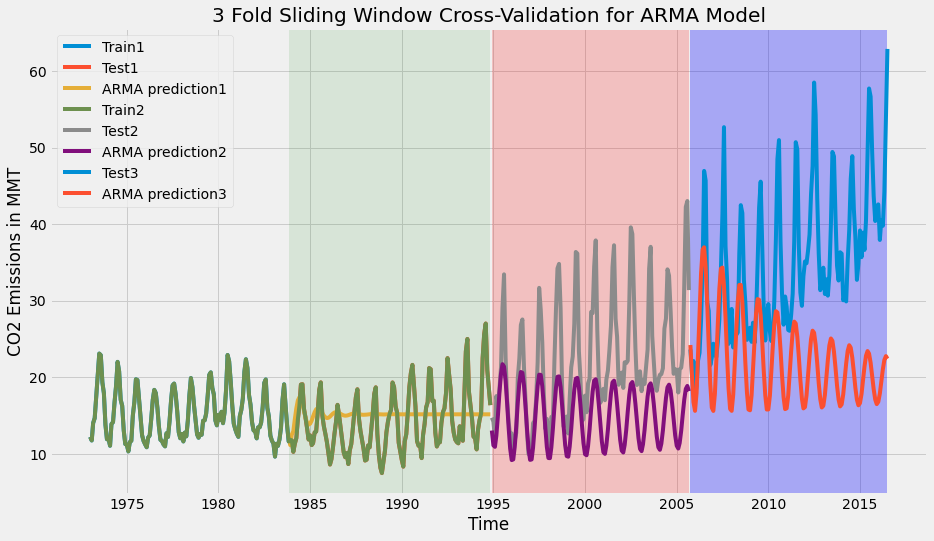

In [151]:
#plot CV for ARMA
#Labels and titles
plt.xlabel("Time")
plt.ylabel("CO2 Emissions in MMT")
plt.title("3 Fold Sliding Window Cross-Validation for ARMA Model")

#First fold- CV
plt.plot(train1.index, train1, label='Train1')
plt.plot(test1.index, test1, label='Test1')
plt.plot(pred1_arma.index, pred1_arma, label='ARMA prediction1')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test1.index[0], test1.index[-1],  facecolor='g', alpha=0.1)

#Second fold
plt.plot(train2.index, train2, label='Train2')
plt.plot(test2.index, test2, label='Test2')
plt.plot(pred2_arma.index, pred2_arma, label='ARMA prediction2')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test2.index[0], test2.index[-1],  facecolor='r', alpha=0.2)

#Third fold
plt.plot(test3.index, test3, label='Test3')
plt.plot(pred3_arma.index, pred3_arma, label='ARMA prediction3')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test3.index[0], test3.index[-1],  facecolor='b', alpha=0.3);

**Observations**
- It appears the ARMA model did not perform as well as the SARIMA and Exponential Smoothing Models. I did try differen p and q values and these were the best models to run on the folds.
- We can see the average RMSE was higher at 9.56 and the average MAPE was higher at 29.88. This was also higher than the model itself on the original training data. 
- We can see the ARMA model in the above plot is also significantly under predicting compared to the test data.

4. Prophet Cross Validation
- Prophet uses a custom cross validation method we will perform below using our 3 folds sliding window.

In [152]:
#make 3 dataframes with the same train folds as above
df_train1 = train1.copy()
df_train1 = train1.reset_index()
df_train1.columns = ['ds','y'] # To use prophet column names should be like that

df_train2 = train2.copy()
df_train2 = train2.reset_index()
df_train2.columns = ['ds','y'] # To use prophet column names should be like that

df_train3 = train3.copy()
df_train3 = train3.reset_index()
df_train3.columns = ['ds','y'] # To use prophet column names should be like that



Fit First fold on cross validation train1

In [153]:
#fit prophet model on train1
m_cv1 = Prophet(interval_width=0.95,yearly_seasonality=True, changepoint_range=0.95)
m_cv1.fit(df_train1)
future_cv1 = m_cv1.make_future_dataframe(periods=26,freq='M')
prophet_pred_cv1 = m_cv1.predict(future_cv1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [154]:
# Run cross validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m_cv1, initial='730 days', period='180 days', horizon = '365 days')


INFO:fbprophet:Making 17 forecasts with cutoffs between 1975-02-12 00:00:00 and 1983-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [155]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper       y     cutoff
0 1975-03-01  14.014073   13.927722   14.120690  11.496 1975-02-12
1 1975-04-01  14.688295   14.380692   15.030308  11.663 1975-02-12
2 1975-05-01  17.961068   17.423674   18.554196  14.975 1975-02-12
3 1975-06-01  20.290338   19.440113   21.198477  16.761 1975-02-12
4 1975-07-01  24.617063   23.449489   25.844142  19.711 1975-02-12

In [156]:
df_cv.tail()

ds       yhat  yhat_lower  yhat_upper       y     cutoff
199 1983-09-01  15.999770   14.623750   17.491902  16.144 1983-01-01
200 1983-10-01  14.610731   13.034208   16.189534  13.591 1983-01-01
201 1983-11-01  11.412734    9.800026   12.897258  11.578 1983-01-01
202 1983-12-01  10.332277    8.633228   11.942439  11.801 1983-01-01
203 1984-01-01  10.795180    9.279750   12.382952  11.738 1983-01-01

In [157]:
# Performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 37 days  1.758529  1.326095  1.138389  0.080863  0.080764      0.60
1 38 days  1.946347  1.395115  1.223380  0.087034  0.085325      0.55
2 42 days  1.949319  1.396180  1.224928  0.085582  0.084550      0.55
3 44 days  1.875698  1.369561  1.193782  0.084398  0.079908      0.60
4 48 days  2.217191  1.489024  1.272976  0.091466  0.079908      0.60

In [158]:
#calculate RMSE
RMSE_pr1 = round(df_p['rmse'].mean(),2)
RMSE_pr1

1.89

In [159]:
#calculate MAPE
MAPE_pr1 = round(df_p['mape'].mean()*100,2)
MAPE_pr1

11.16

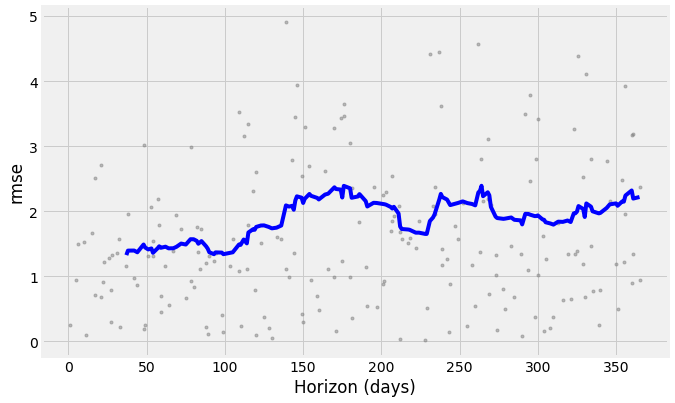

In [160]:
# Plot rmse
from fbprophet.plot import plot_cross_validation_metric
fig_rmse1 = plot_cross_validation_metric(df_cv, metric='rmse')


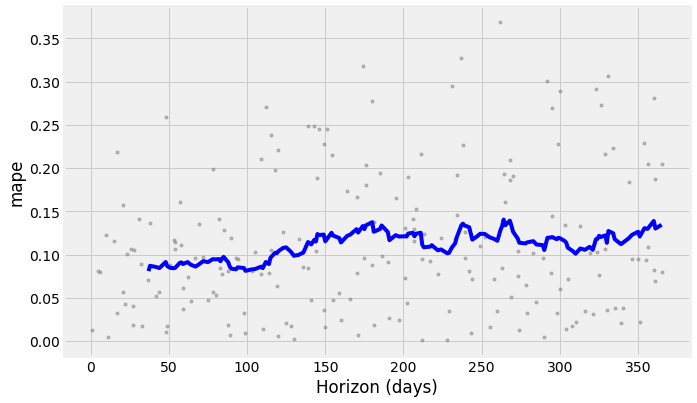

In [161]:
# Plot mape
from fbprophet.plot import plot_cross_validation_metric
fig_mape1 = plot_cross_validation_metric(df_cv, metric='mape')


Fit 2nd train fold on Prophet

In [162]:
#fit 2nd prophet model on train2
m_cv2 = Prophet(interval_width=0.95,yearly_seasonality=True, changepoint_range=0.95)
m_cv2.fit(df_train2)
future_cv2 = m_cv2.make_future_dataframe(periods=26,freq='M')
prophet_pred_cv2 = m_cv2.predict(future_cv2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [163]:
# Run cross validation

df_cv2 = cross_validation(m_cv2, initial='730 days', period='180 days', horizon = '365 days')


INFO:fbprophet:Making 39 forecasts with cutoffs between 1975-02-09 00:00:00 and 1993-11-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [164]:
df_cv2.head()

ds       yhat  yhat_lower  yhat_upper       y     cutoff
0 1975-03-01  14.014073   13.884929   14.123213  11.496 1975-02-09
1 1975-04-01  14.688295   14.311713   15.011070  11.663 1975-02-09
2 1975-05-01  17.961068   17.339466   18.585183  14.975 1975-02-09
3 1975-06-01  20.290338   19.345675   21.236734  16.761 1975-02-09
4 1975-07-01  24.617063   23.290408   25.902049  19.711 1975-02-09

In [165]:
df_cv2.tail()

ds       yhat  yhat_lower  yhat_upper       y     cutoff
463 1994-07-01  21.811062   19.563909   24.239183  25.590 1993-11-01
464 1994-08-01  21.902246   19.389640   24.409868  26.995 1993-11-01
465 1994-09-01  18.744500   16.367409   21.013790  20.897 1993-11-01
466 1994-10-01  17.128317   14.731586   19.642956  18.636 1993-11-01
467 1994-11-01  14.534746   12.198760   16.895291  16.330 1993-11-01

In [166]:
# Performance metrics

df_p2 = performance_metrics(df_cv2)
df_p2.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 36 days  1.876668  1.369915  1.091151  0.080603  0.077193  0.717391
1 39 days  1.804892  1.343463  1.077881  0.079541  0.080073  0.728261
2 40 days  1.709711  1.307559  1.054521  0.076787  0.072550  0.739130
3 41 days  1.867714  1.366643  1.107002  0.077689  0.077193  0.695652
4 45 days  1.868068  1.366773  1.092551  0.076434  0.065040  0.706522

In [167]:
#calculate RMSE
RMSE_pr2 = round(df_p2['rmse'].mean(),2)
RMSE_pr2

1.89

In [168]:
#calculate MAPE
MAPE_pr2 = round(df_p2['mape'].mean()*100,2)
MAPE_pr2

10.99

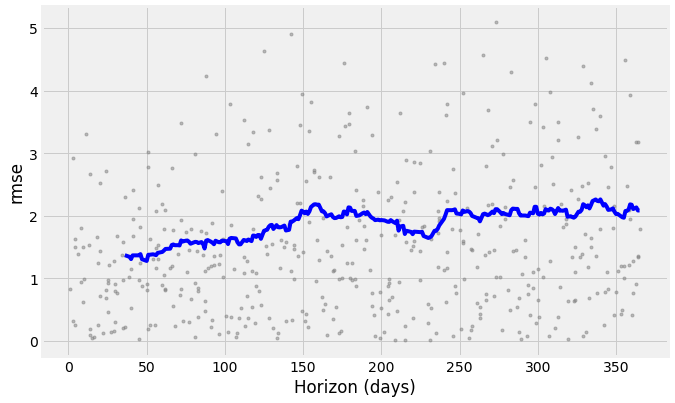

In [169]:
# Plot rmse
fig_rmse2 = plot_cross_validation_metric(df_cv2, metric='rmse')

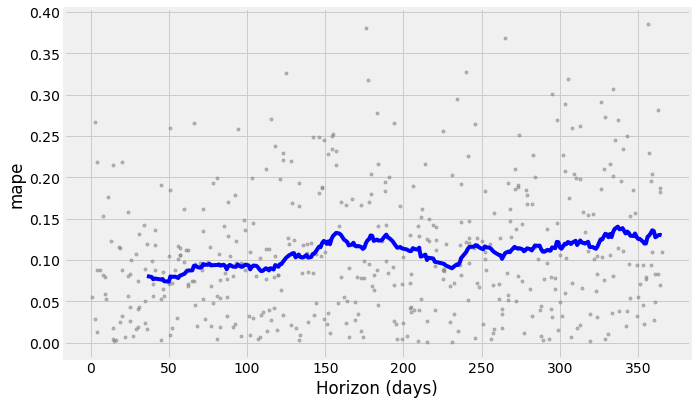

In [170]:
# Plot mape
fig_mape2 = plot_cross_validation_metric(df_cv2, metric='mape')

Fit 3rd Train fold on Prophet

In [171]:
#fit prophet model on train1
m_cv3 = Prophet(interval_width=0.95,yearly_seasonality=True, changepoint_range=0.95)
m_cv3.fit(df_train3)
future_cv3 = m_cv3.make_future_dataframe(periods=26,freq='M')
prophet_pred_cv3 = m_cv3.predict(future_cv3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [172]:
# Run cross validation

df_cv3 = cross_validation(m_cv3, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 61 forecasts with cutoffs between 1975-02-06 00:00:00 and 2004-09-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [173]:
df_cv3.head()

ds       yhat  yhat_lower  yhat_upper       y     cutoff
0 1975-03-01  14.014073   13.905686   14.132878  11.496 1975-02-06
1 1975-04-01  14.688295   14.370071   15.034926  11.663 1975-02-06
2 1975-05-01  17.961068   17.337606   18.576035  14.975 1975-02-06
3 1975-06-01  20.290338   19.325349   21.205051  16.761 1975-02-06
4 1975-07-01  24.617063   23.339842   25.868418  19.711 1975-02-06

In [174]:
df_cv3.tail()

ds       yhat  yhat_lower  yhat_upper       y     cutoff
725 2005-05-01  26.544699   22.352203   30.949612  23.001 2004-09-01
726 2005-06-01  29.437803   25.184914   33.836879  32.282 2004-09-01
727 2005-07-01  33.782979   29.474293   38.253256  42.233 2004-09-01
728 2005-08-01  34.027357   29.371116   38.694978  43.005 2004-09-01
729 2005-09-01  29.355685   24.839667   33.957100  31.368 2004-09-01

In [175]:
# Performance metrics

df_p3 = performance_metrics(df_cv3)
df_p3.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 38 days  4.063033  2.015697  1.545522  0.097875  0.080157  0.739726
1 39 days  4.070733  2.017606  1.539986  0.097551  0.080157  0.739726
2 40 days  4.222391  2.054846  1.575237  0.099464  0.080757  0.739726
3 41 days  4.212739  2.052496  1.567977  0.098863  0.080757  0.739726
4 42 days  4.185443  2.045836  1.564135  0.098723  0.080757  0.744292

In [176]:
#Calculate RMSE
RMSE_pr3 = round(df_p3['rmse'].mean(),2)
RMSE_pr3

2.71

In [177]:
#Calculate MAPE
MAPE_pr3 = round(df_p3['mape'].mean()*100,2)
MAPE_pr3

11.96

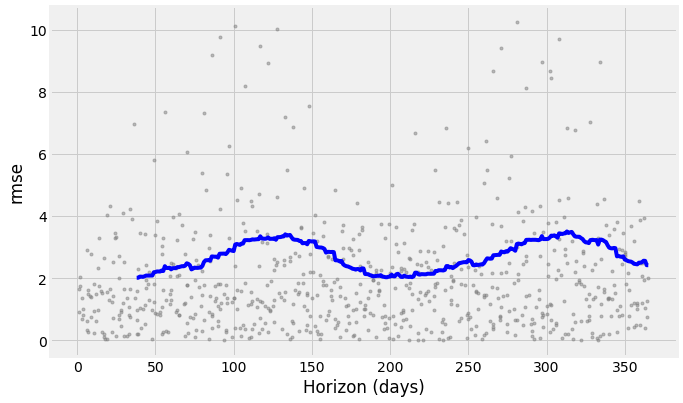

In [178]:
# Plot rmse
fig_rmse3 = plot_cross_validation_metric(df_cv3, metric='rmse')

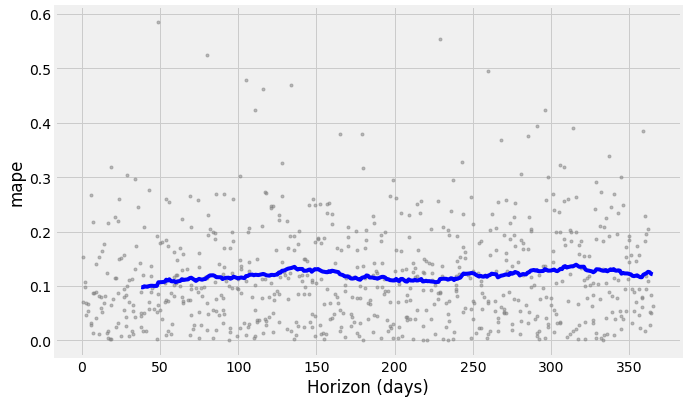

In [179]:
# Plot mape
fig_mape3 = plot_cross_validation_metric(df_cv3, metric='mape')

In [180]:
#overall outcome for all 3 folds cv for Prophet
print ("RMSE1 for Prophet:", RMSE_pr1)
print ("RMSE2 for Prophet:", RMSE_pr2)
print ("RMSE3 for Prophet:", RMSE_pr3)

Overall_rmse_pr=round((RMSE_pr1+RMSE_pr2+RMSE_pr3)/3,2)
print ("Overall RMSE for Prophet:", Overall_rmse_pr) 
print(" ")
print(" ")
print ("MAPE1 for Prophet:", MAPE_pr1)
print("MAPE2 for Prophet:", MAPE_pr2)
print("MAPE3 for Prophet:", MAPE_pr3)

Overall_MAPE_pr=round((MAPE_pr1+MAPE_pr2+MAPE_pr3)/3,2)
print ("Overall MAPE for Prophet:", Overall_MAPE_pr) 

RMSE1 for Prophet: 1.89
RMSE2 for Prophet: 1.89
RMSE3 for Prophet: 2.71
Overall RMSE for Prophet: 2.16
 
 
MAPE1 for Prophet: 11.16
MAPE2 for Prophet: 10.99
MAPE3 for Prophet: 11.96
Overall MAPE for Prophet: 11.37


**Observations**
- Prophet had the lowest average RMSE at 2.16 and lowest average MAPE at 11.37. However we should note that even though we trained the prophet validation models on the same folds as the other models, the method by which Prophet performs cross validation is done in days which is different than the monthly data that we have. So this means the cross validation may not be as authentic for the Prophet model as it was for the other models. 
- Having said that, Prophet did give us virtually the exact prediction for July 2016-July 2017 as the raw historical data. Our prediction from the Prophet model was 571.44 and the raw historical data from EIA.gov shows the actual CO2 emissions for natural gas for electricity sectory was 571.537. This makes me shift towards choosing Prophet as the model to implement in production.
- If we look further at the prediction Prophet gave us for July 2015-July 2016 it was 558.65 (see cell below). This compared to the actual raw historical data which is 611 is not too far off. 

In [181]:
resamp_month_prophet['Predicted Value'].iloc[181:194].sum()

558.6544683869149

Final Cross Validation Results

In [212]:
#build dataframe
index1 = ['Triple Exp Smoothing','SARIMA','ARMA','Prophet']
data1 = {'RMSE':[4.87,3.69,9.56,2.16],'MAPE':[14.6, 12.24,29.88,11.37]}
cv_results = pd.DataFrame(data=data1,index=index1)

#print df
print("Cross Validation Results")
cv_results

Cross Validation Results


RMSE   MAPE
Triple Exp Smoothing  4.87  14.60
SARIMA                3.69  12.24
ARMA                  9.56  29.88
Prophet               2.16  11.37

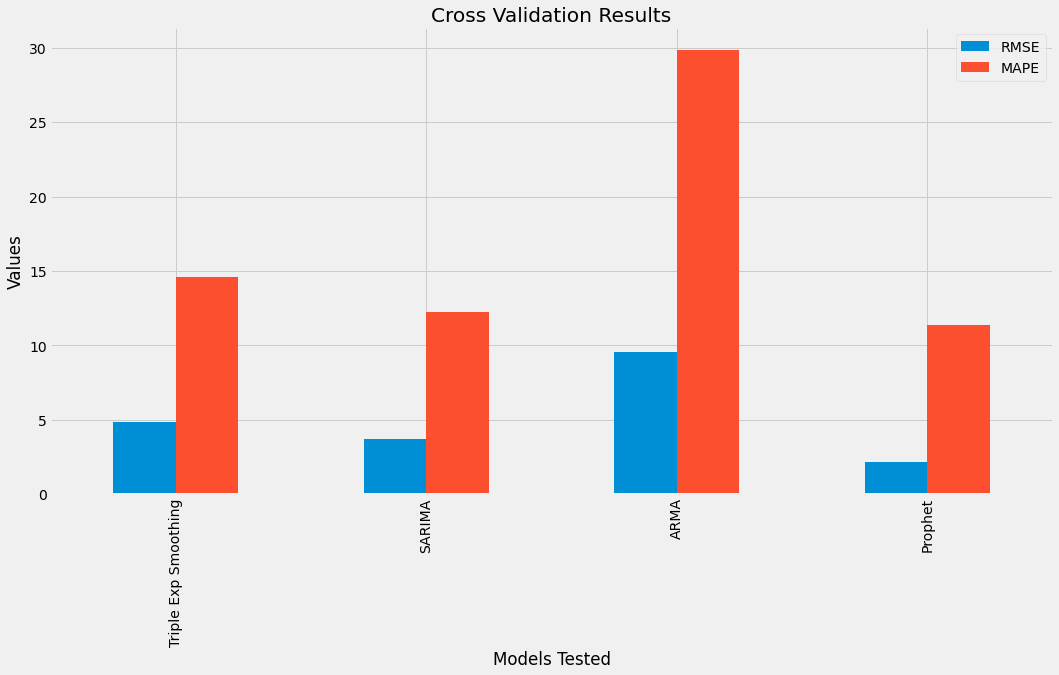

In [183]:
#plot cross validation results
cv_results.plot(kind='bar',figsize=(16,8))
plt.title('Cross Validation Results')
plt.xlabel('Models Tested')
plt.ylabel('Values')
plt.show()

**Observations**
-Even though MAPE is a percent and RMSE is not we can roughly see the comparisons for each model. 
- As we said above, Prophet performed the best and SARIMA was closest. I think we can say that Triple Exponential Smoothing was closest to SARIMA and ARMA did not do very well.
- Based on these results I would move to implement the Prophet model and use the SARIMA model as a backup or alternate implementation.

Accuracy Dataframe results

In [208]:
#Final accuracy results
index2 = ['Triple Exp Smoothing','SARIMA','ARMA','Prophet']
data2 = {'RMSE':[1.296,2.641,2.565,2.328],'MAPE':[17.511,20.176,14.676,19.762]}
accuracy = pd.DataFrame(data=data2,index=index2)

#print df
print("Accuracy Measures for all Forecast Models")
accuracy

Accuracy Measures for all Forecast Models


RMSE    MAPE
Triple Exp Smoothing  1.296  17.511
SARIMA                2.641  20.176
ARMA                  2.565  14.676
Prophet               2.328  19.762

**Observations**
- Again we can see that Triple Exponential Smoothing had the best RMSE at 1.296 while ARMA had the best MAPE at 14.676.
- The 3 other models had very similar RMSE's but Prophet was the next best compared to exponential smoothing. 
- It is interesting that Prophet's average cross validation RMSE was 2.16 and its RMSE as seen above on the actual data was 2.328. SARIMA also had a cross validation RMSE of 3.69 and an actual RMSE of 2.641, again very close. I think this proves both models are very consistent.

Final Forecast for July 2016-July 2017 for all models

In [185]:
#Final accuracy results
index3 = ['Triple Exp Smoothing','Actual 2016-2017','Prophet','ARMA','SARIMA']
data3 = {'Total CO2 Emissions Forecast July 2016-July 2017':[613.229,571.5,571.440,562.68,524.42]}
Forecast_year = pd.DataFrame(data=data3,index=index3)

#print df
Forecast_year

Total CO2 Emissions Forecast July 2016-July 2017
Triple Exp Smoothing                                           613.229
Actual 2016-2017                                               571.500
Prophet                                                        571.440
ARMA                                                           562.680
SARIMA                                                         524.420

Plot of all forecasts compared to train and test data

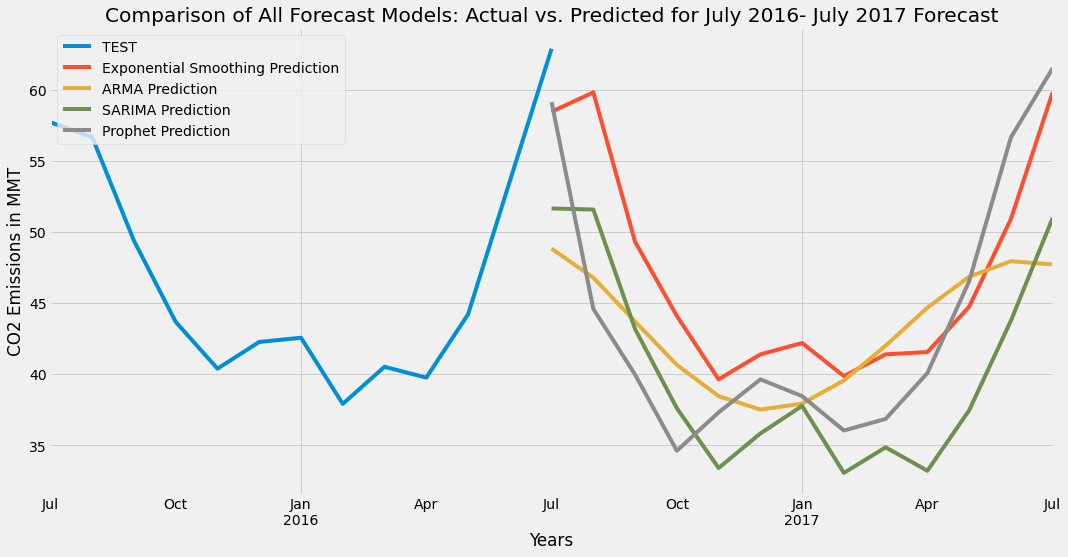

In [211]:
#Total forecast for July 2016-2017 comparison
df_test['Value'].plot(legend=True,label='TEST',figsize=(16,8))
exp_smooth.plot(legend=True,label='Exponential Smoothing Prediction')
forecasted_ARMA.plot(legend=True,label='ARMA Prediction')
sarima_fcast.plot(legend=True,label='SARIMA Prediction')
prophet_co2.plot(legend=True,label='Prophet Prediction')
plt.title('Comparison of All Forecast Models: Actual vs. Predicted for July 2016- July 2017 Forecast')
plt.xlabel('Years')
plt.ylabel("CO2 Emissions in MMT")
plt.show();

**Observations**
- Compared to the test data set it appears that Exponential Smoothing and Prophet are almost identical in shape and range. 
- Exponential Smoothing shows an increase in CO2 emissions in the forecast compared to the test set data.
- We can see that ARMA and Sarima have different shaped forecasts in comparison to the test set.

#Conclusions and Recommendations

1. Based on Cross Validation and Accuracy Model results it appears that Prophet is the best model followed by SARIMA.
2. Prophet and SARIMA were also the most consistent models from the actual data to the cross validation performing similar in the RMSE values.
3. Prophet was able to actually by chance predict the actual forecast for July 2016-July 2017 with a prediction of 571.440 compared to the actual EIA.gov data which shows the actual result was 571.537. 
* There is an identified trend in the data and in what our forecast is predicting. 
* Consistent upward trend from year to year since 2009 from January to January.
* Up --> Down --> Up trend from July to July. Based on our forecast and historical data emissions were:

a) July 2014-2015: 538.298<br>
b) July 2015-2016: 607.844<br>
c) July 2016-2017: Our forecast is 571.440, actual (historical EIA.gov) is 571.537. <br>
d) July 2017-2017: 609.577.<br>
<br>

4. I would move for implementation of Prophet and use Sarima as an alternate model.
5. Prophet is a great model for this dataset as it can handle the multiple changepoints that occur and the model parameters accounted for that using the changepoint_range and changepoint_prior_scale parameters. Prophet is also able to use its Bayesian curve fitting algorithm an alternate approach to modeling seasonal data. Using the Yearly seasonality parameter was helpful as this data has yearly seasonality but we in the future could use monthly, weekly or even daily seasonality.
6. SARIMA is an excellent alternate model as it works well with seasonal data such as this dataset and we can see that with how well it performed.
7. For implementation we would want to be careful of "Model Drift" and make sure to retrain the models when new data comes in to compare the actual trend to the predicted forecast. 
8. For implementation I would suggest building a dashboard that models the historical data for the previous years, the current trend, and the 2016-2017 forecast. The idea is the trend would be updated as new data comes in to compare outcomes. The dashboard could be made available online to the public for general use.
9. The major issue with Natural Gas use is that it is an inexpensive fuel type that is increasing in use in the electrical sector. CO2 accounts for 84% of all greenhouse gases with 30 bilion tons emitted per year. It accounts for 40% of electric power consumption in the USA. The most concerning issue with Natural Gas is methane leakage during natural gas production. Methane from natural gas leakage is leading to increased CO2 emissions and global warming.
10. Recommendations to decrease natural gas use in the electrical sector and thus decrease CO2 emissions:
- Solar Power
- Wind Power
- Hydroelectric Power
- Carbon can be captured and stored underground through a process known as carbon capture and storage (CCS). The oil and gas industry has stressed the potential benefits of CCS technology in tackling emissions.
- Consider other clean energy solutions and renewable energy solutions.
- Reduce Methane leakage in extraction and transportation of natural gas. 
- Blending Hydrogen with natural gas in piplines. 
- IoT gas sensors -- study the data!
- Consider monitoring seasonal effects of CO2 emissions as there is a significant decrease in CO2 emissions in the winter/fall as compared to spring/summer. Are there seasonal things that can be done in the electrical sector to account for this discrepancy? 
11. Overall we achieved our goal of evaluating CO2 emissions for Natural Gas Data. We saw that there is a steady increase year to year and this is a problem that should continually be monitored closely to avoid further climate change issues. Retraining the model on new data often will make the forecasts more robust over time. Also continuing to evaluate micro changes in the data such as changepoints should be considered. 
12. A last interesting point is that I did try different training set sizes using the last 5, 10 and 15 years of data. I found the best results were obtained using a larger training set of 15 years.

# Future Directions

1. Consider using Deep Learning Models such as LSTM in Keras/Tensorflow or DeepAR from Amazon. 
2. Consider performing multivariate analysis of all energy sources for CO2 emissions using deep learning or a VAR model. 
3. Consider analyzing Methane leakage data as this is a major issue with CO2 emissions from natural gas. 
4. Consider comparing forecast models to machine learning models.

### Thank you!